#### Research Project:

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed (Col -21)
#### Tasks :
1. Import the relevant packages
2. Download and explore the dataset
3. Prepare the dataset for training
4. Use any prediction algorithm based upon the EDA
5. Train the model to fit the data
6. Make predictions using the trained model
7. Create a test case and generate a predicted result from the system

## Import the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Note : This library has been only used to hide and ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Download and explore the dataset

In [3]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().any() #searching for null values

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

## Prepare the dataset for training
There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [8]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


In [9]:
df.replace('unknown', np.NaN, inplace=True)

In [10]:
df.isnull().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Number of distinct values in variables

In [11]:
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [12]:
#Function to label the count on top of each bar in graph

def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)    

#### EDA <br>
a. Categorical Variables

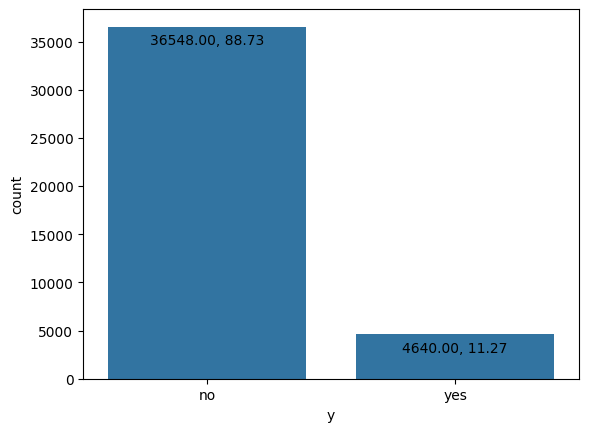

In [13]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


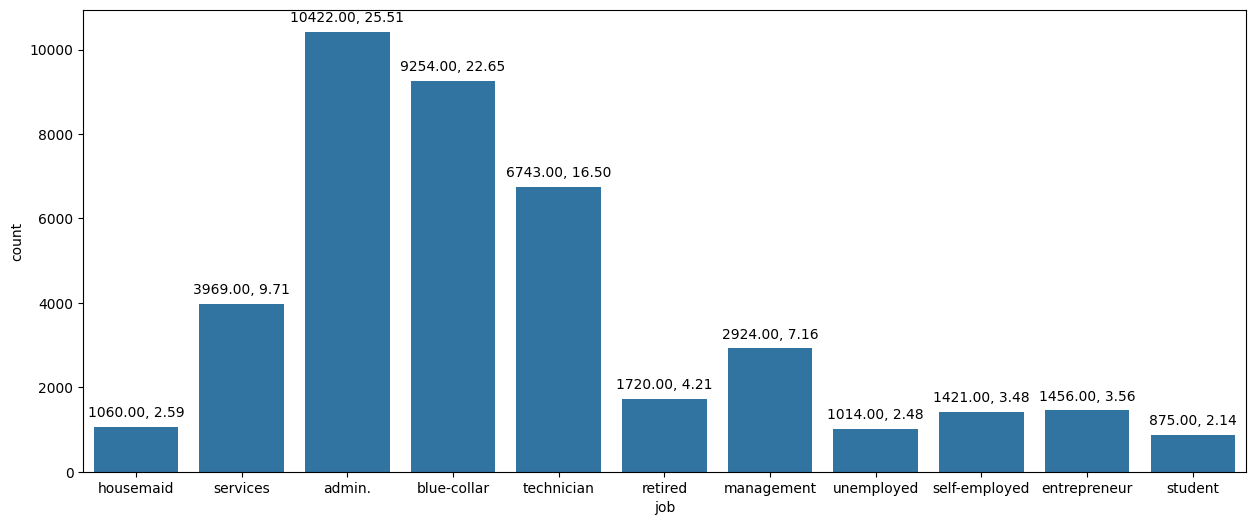

Marital


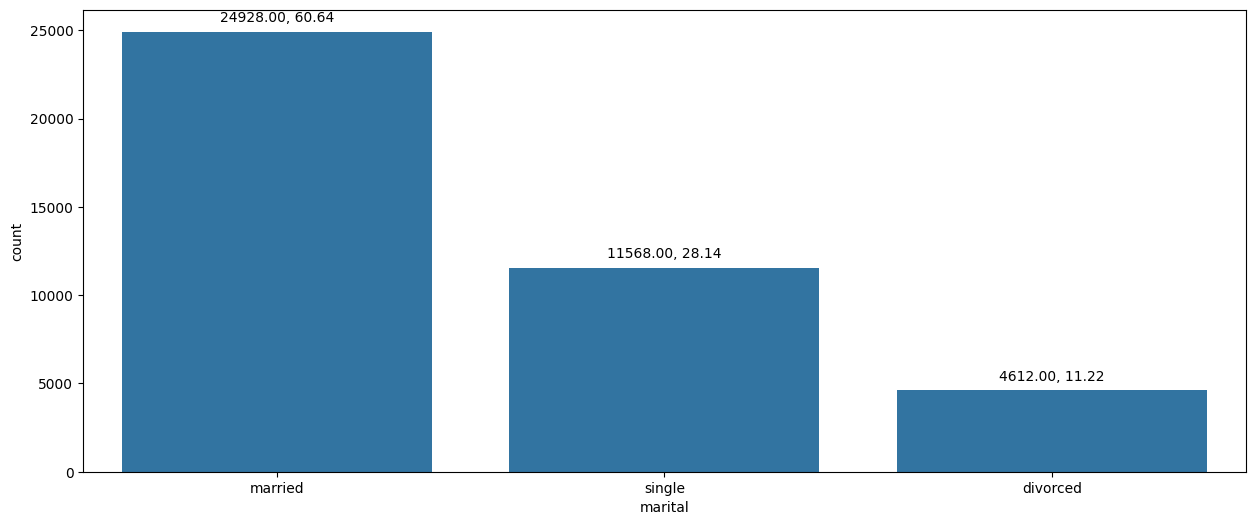

Education


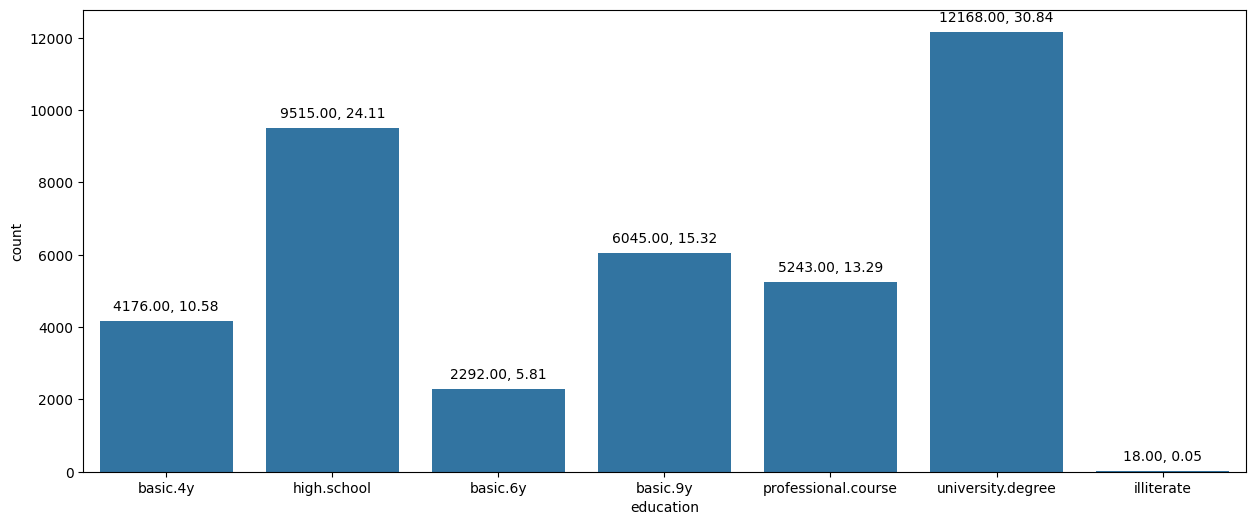

Default


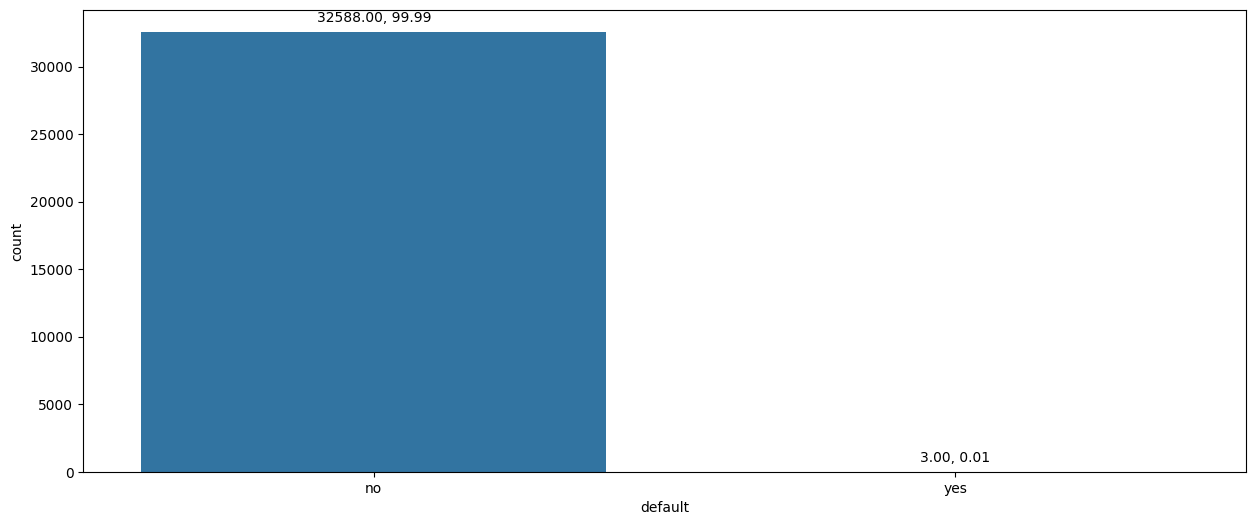

Housing


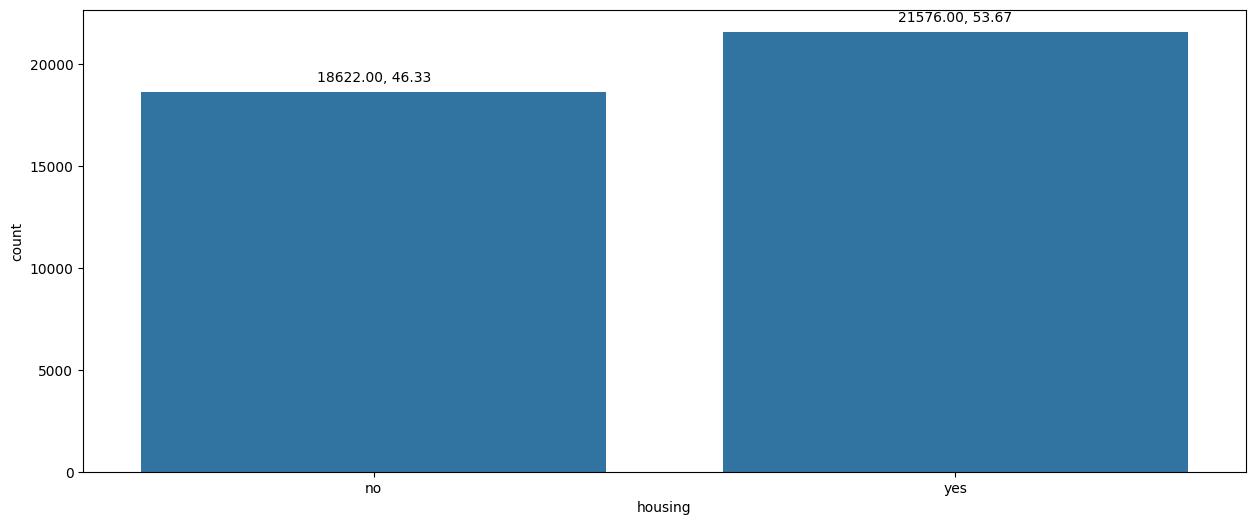

Loan


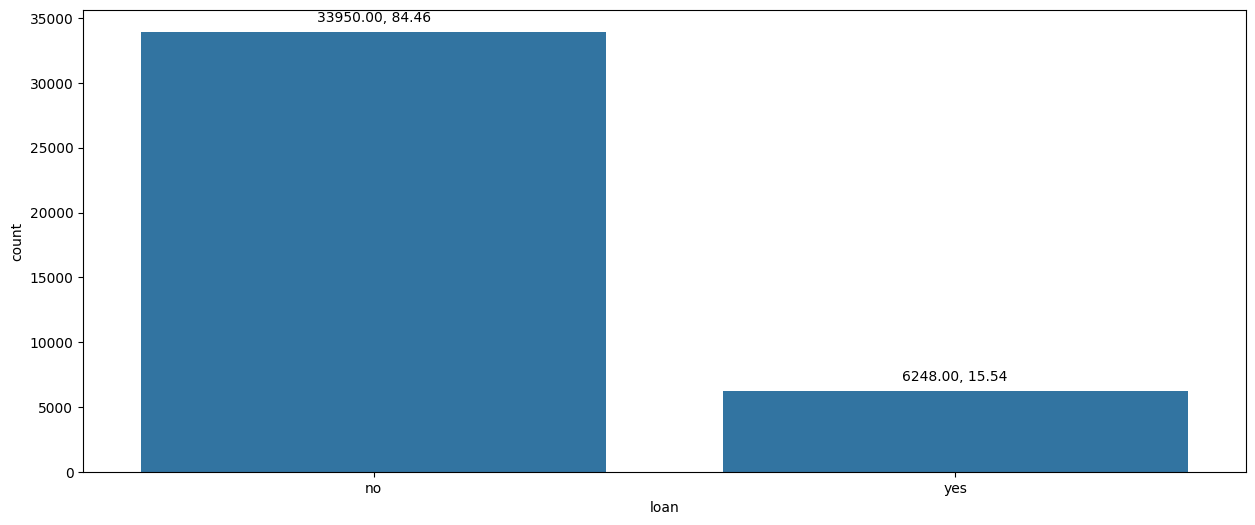

Contact


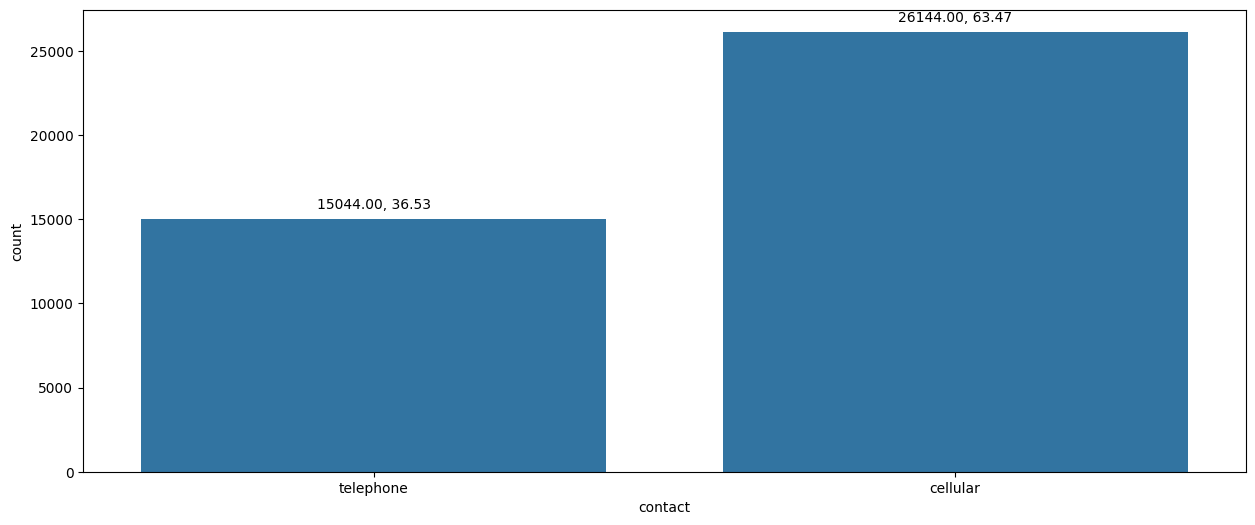

Month


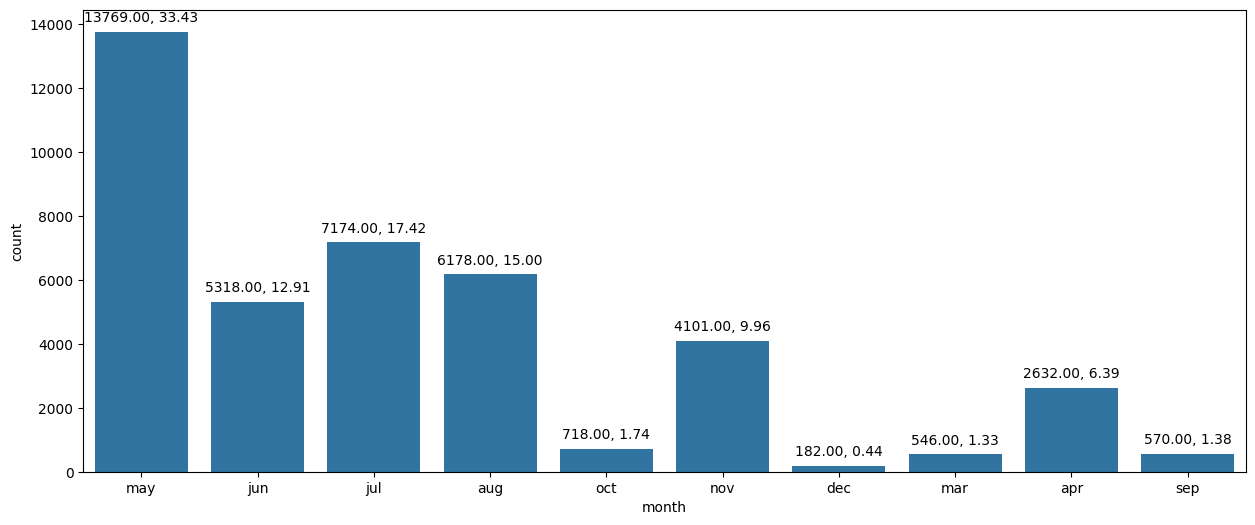

Day_Of_Week


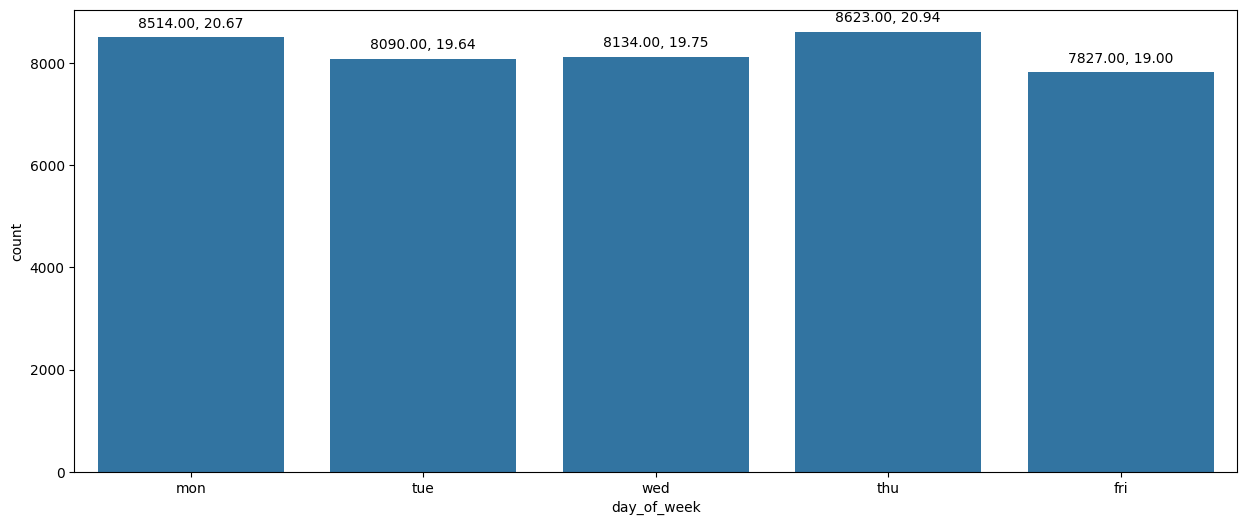

Poutcome


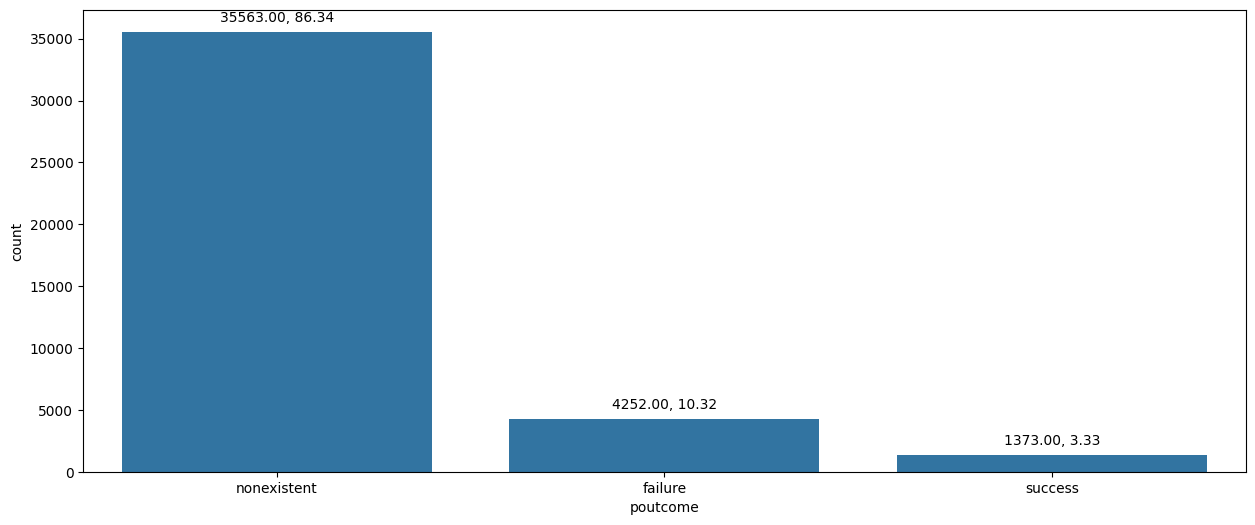

In [14]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

#### Insights from categorical variables (based on univariate analysis)

1. **Job**: Highest Number (around 25%) of application are from admin type of job.
2. **Default**: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
3. **Marital**: Around 60% of client were approached were married. 
4. **Education**: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)
5. **Housing**: Housing loan does not have much effect on the number of term deposit purchased.
6. **Loan**: We approach around 84% of client with not having personal loan. 
7. **Contact**: Around 64% calls are from cellular.
8. **Month**: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 
9. **day_of_week**: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
10. **poutcome**: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [15]:
# Since 'default' column has no impact on the client subscribing for term deposit we drop it.
df.drop(["default"], axis = 1, inplace=True)

In [16]:
var_categorical = list(set(var_categorical) - set(['default']))

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null  floa

b. Numerical Variables

In [19]:
# Drop the 'duration' column
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)

In [20]:
var_numerical = list(set(var_numerical) - set(['duration']))

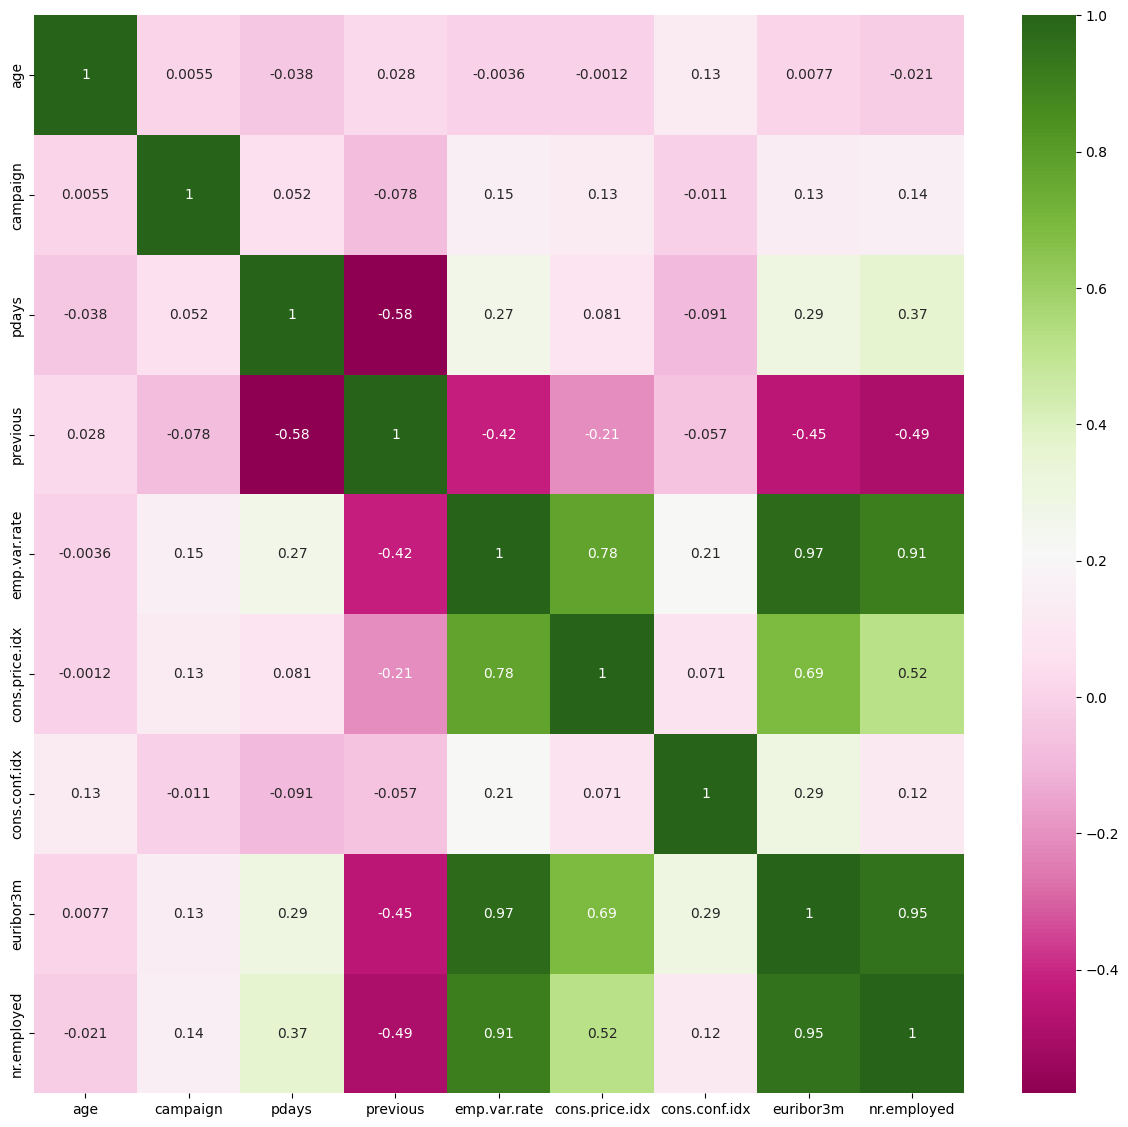

In [21]:
# Assuming 'df' is your DataFrame
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 14))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PiYG')
plt.show()



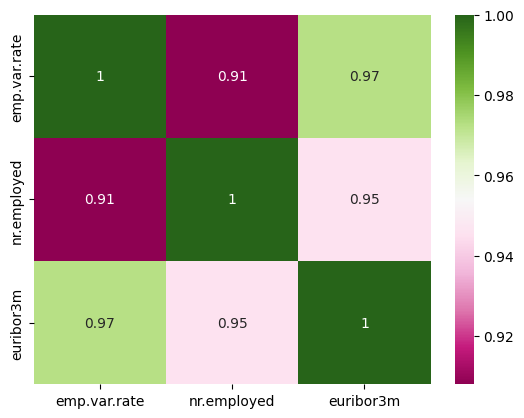

In [22]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='PiYG')
plt.show()

**Positive high correlation between:**
1. 'emp.var.rate' and 'nr.employed'
2. 'emp.var.rate' and 'euribor3m'
3. 'euribor3m' and 'nr.employed'

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor'(euro interbank offered rate) also give us the price of money in current market.

In [23]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [24]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Age


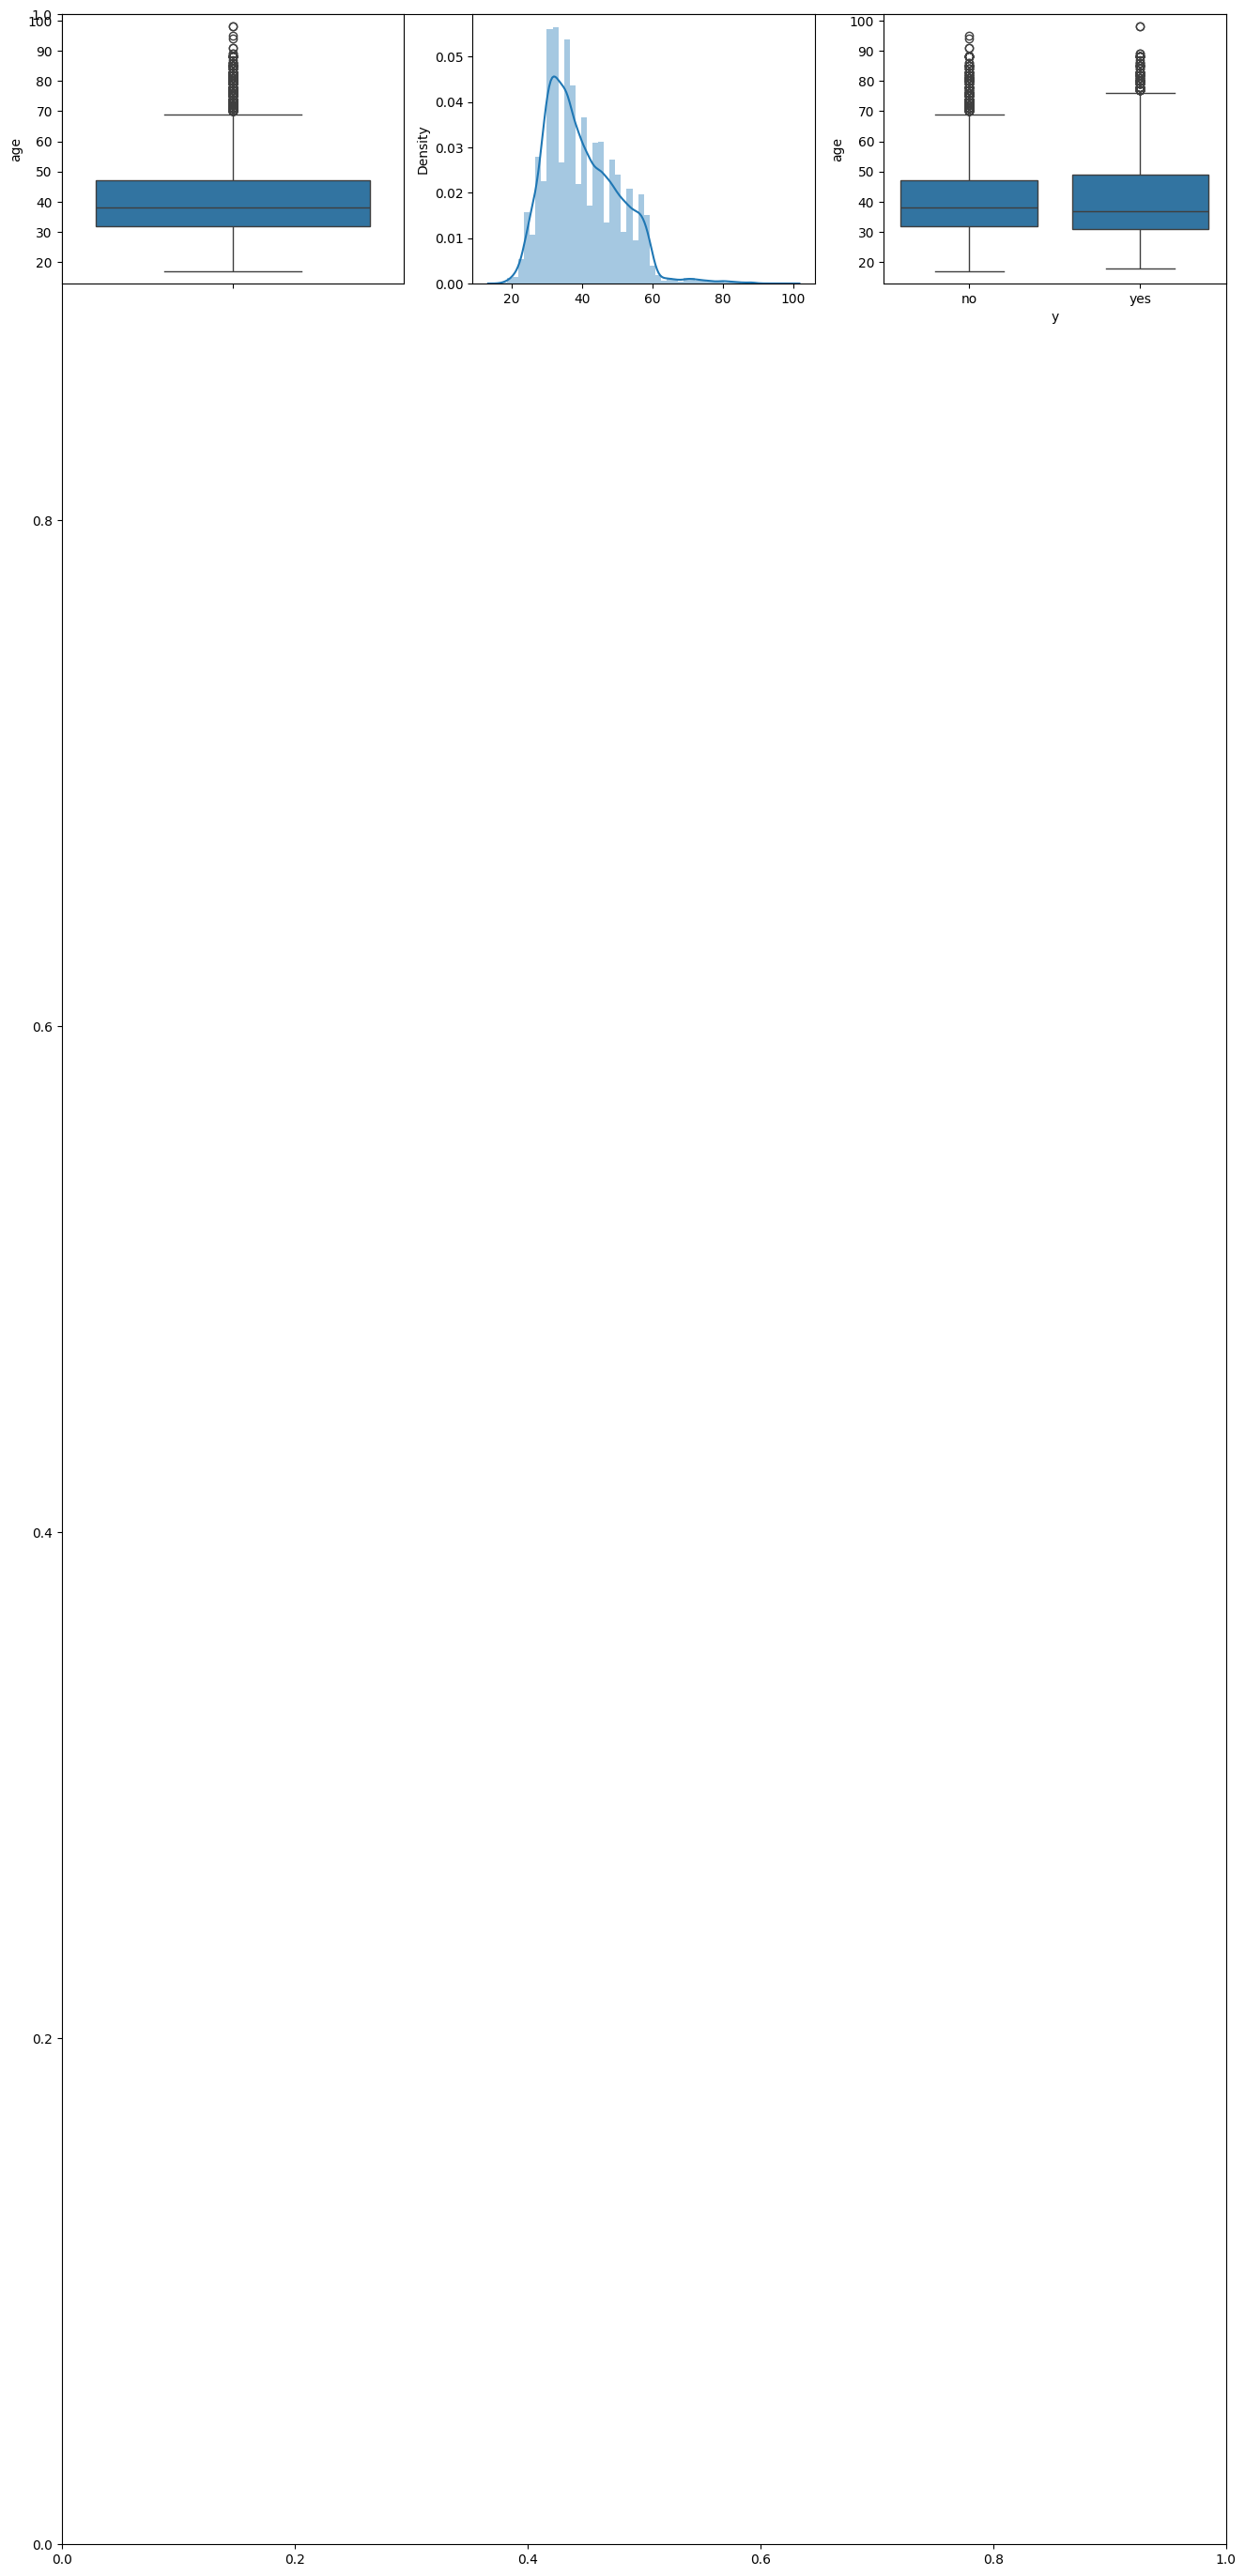

Cons.Price.Idx


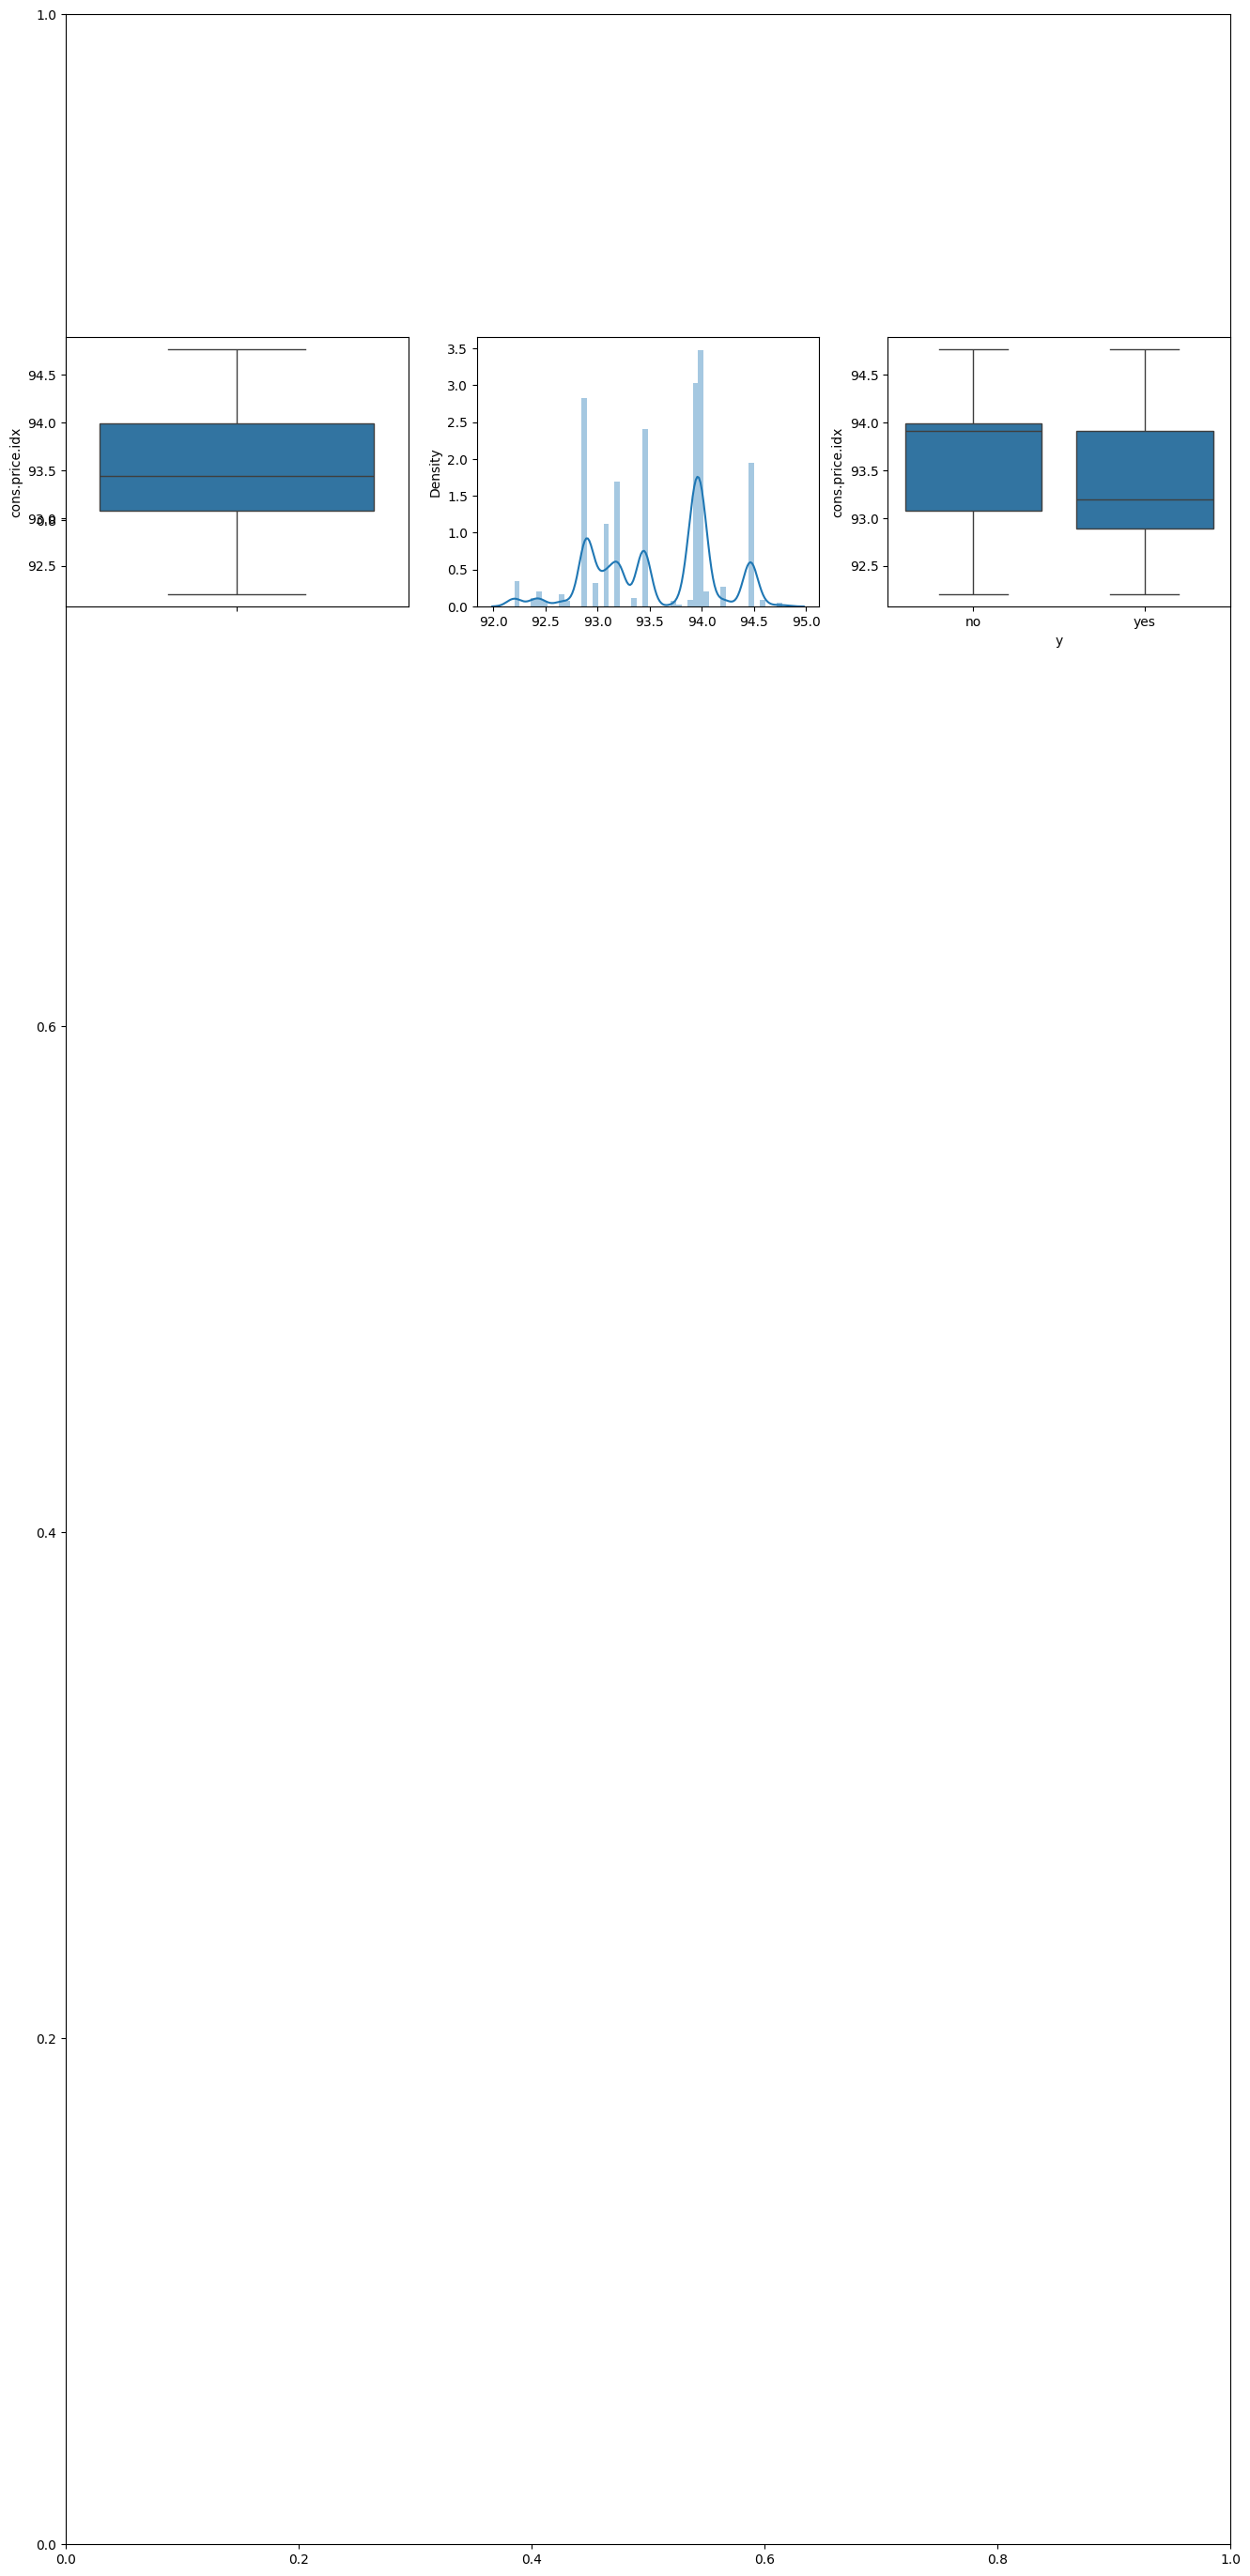

Cons.Conf.Idx


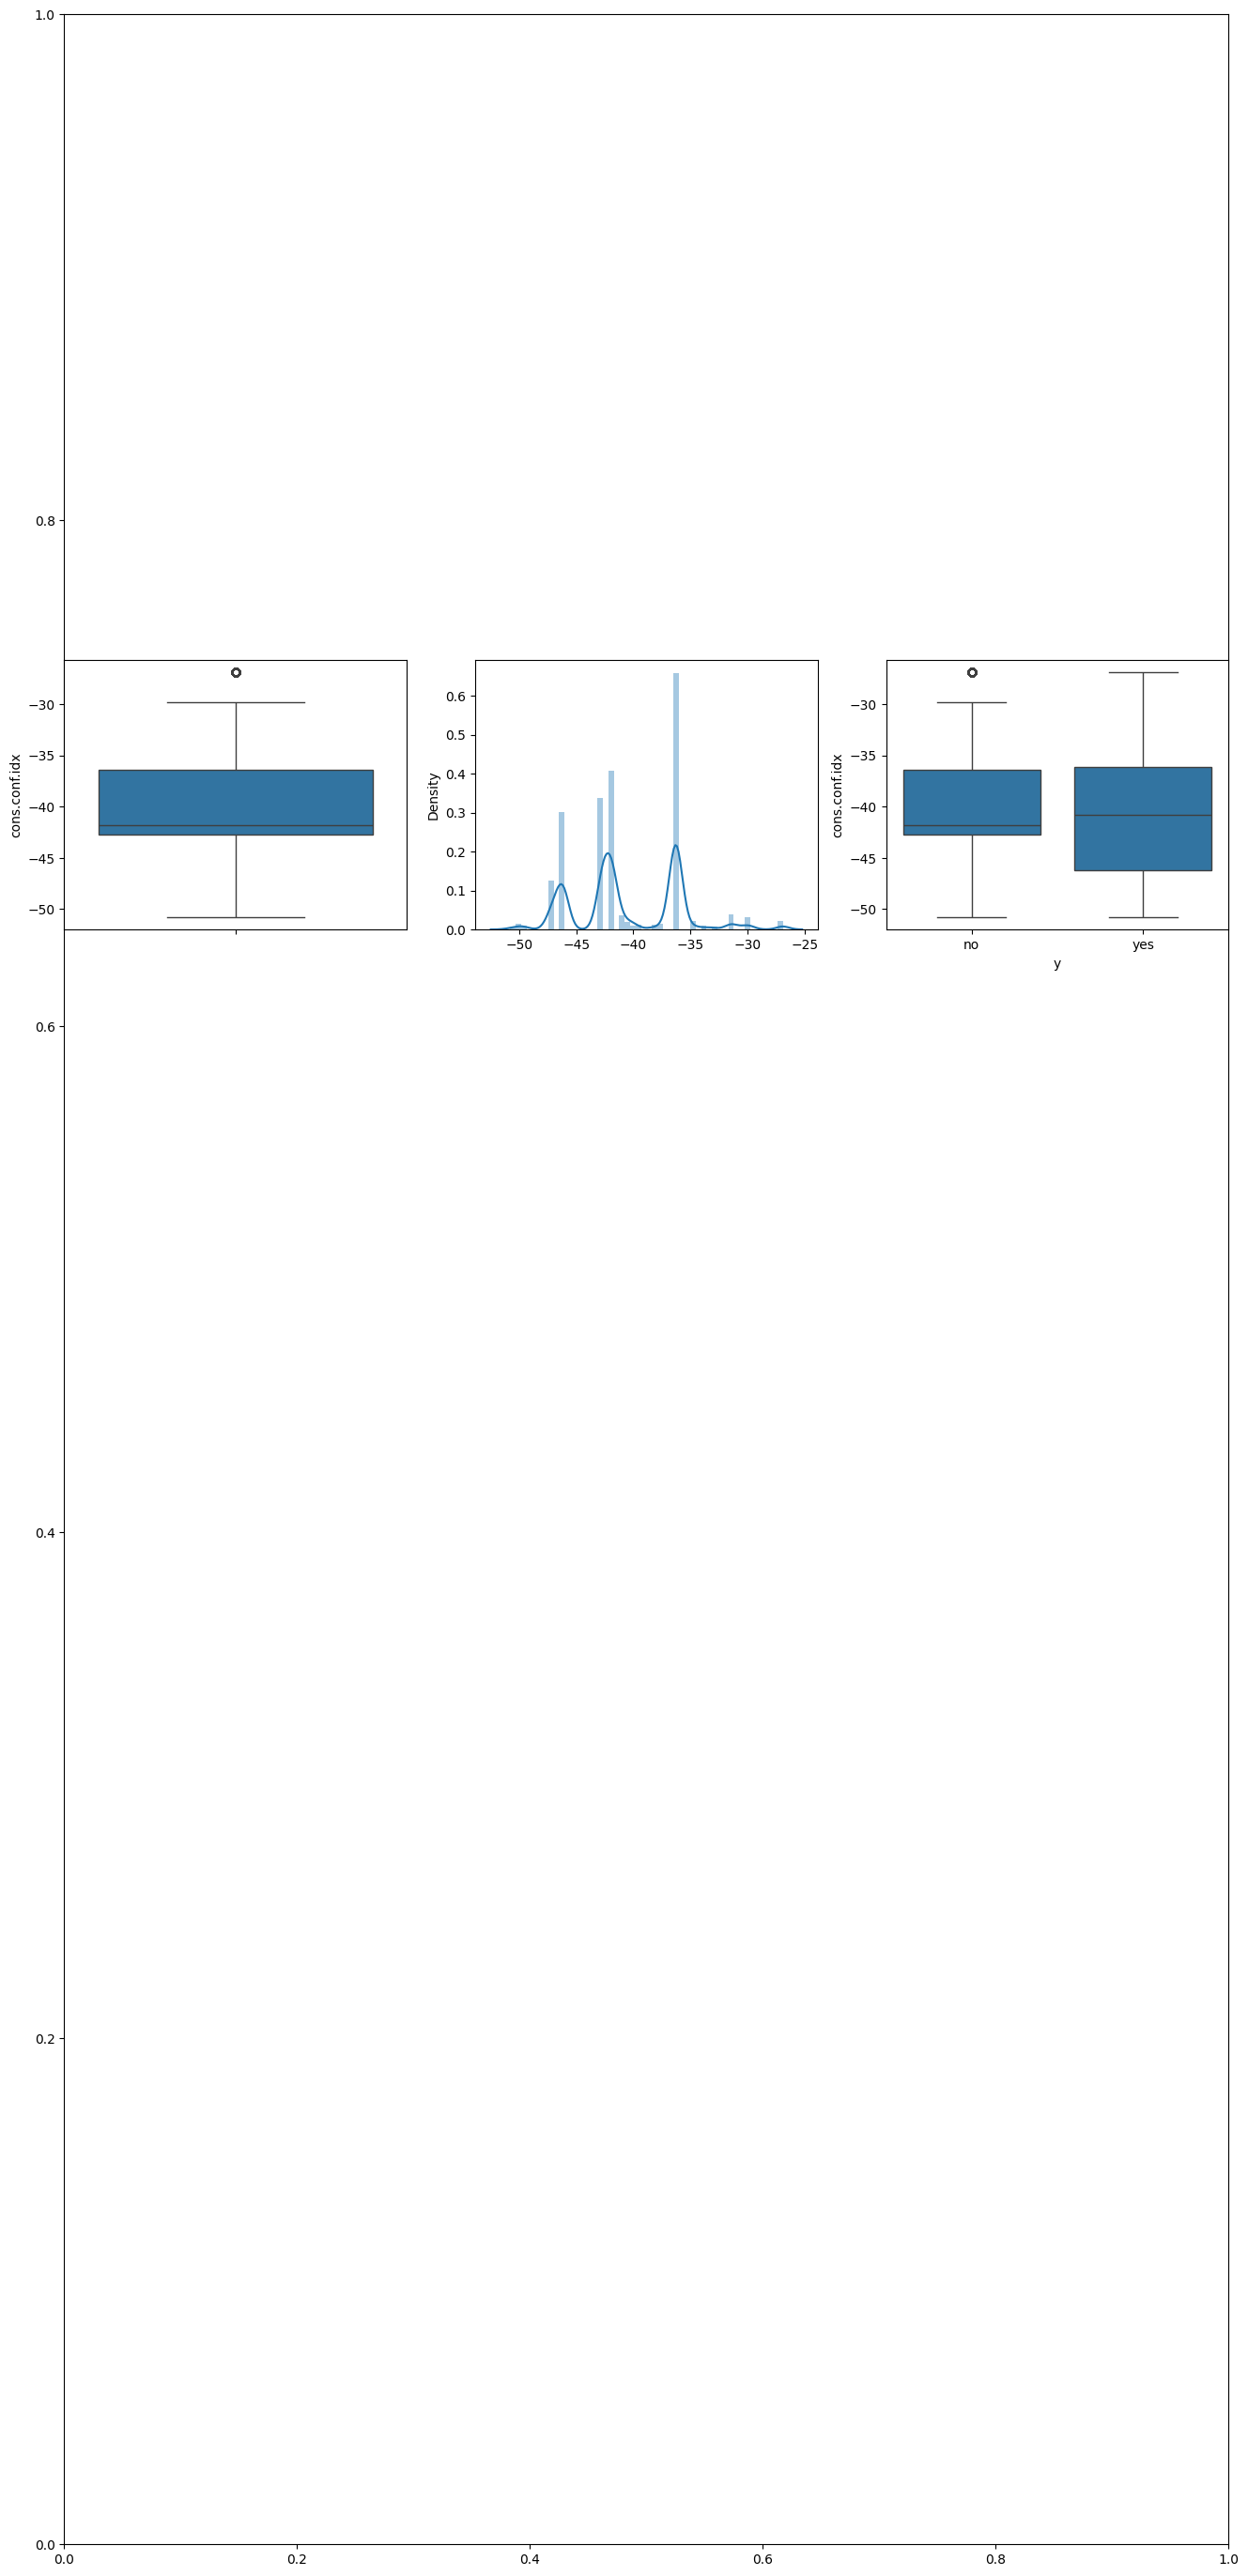

Previous


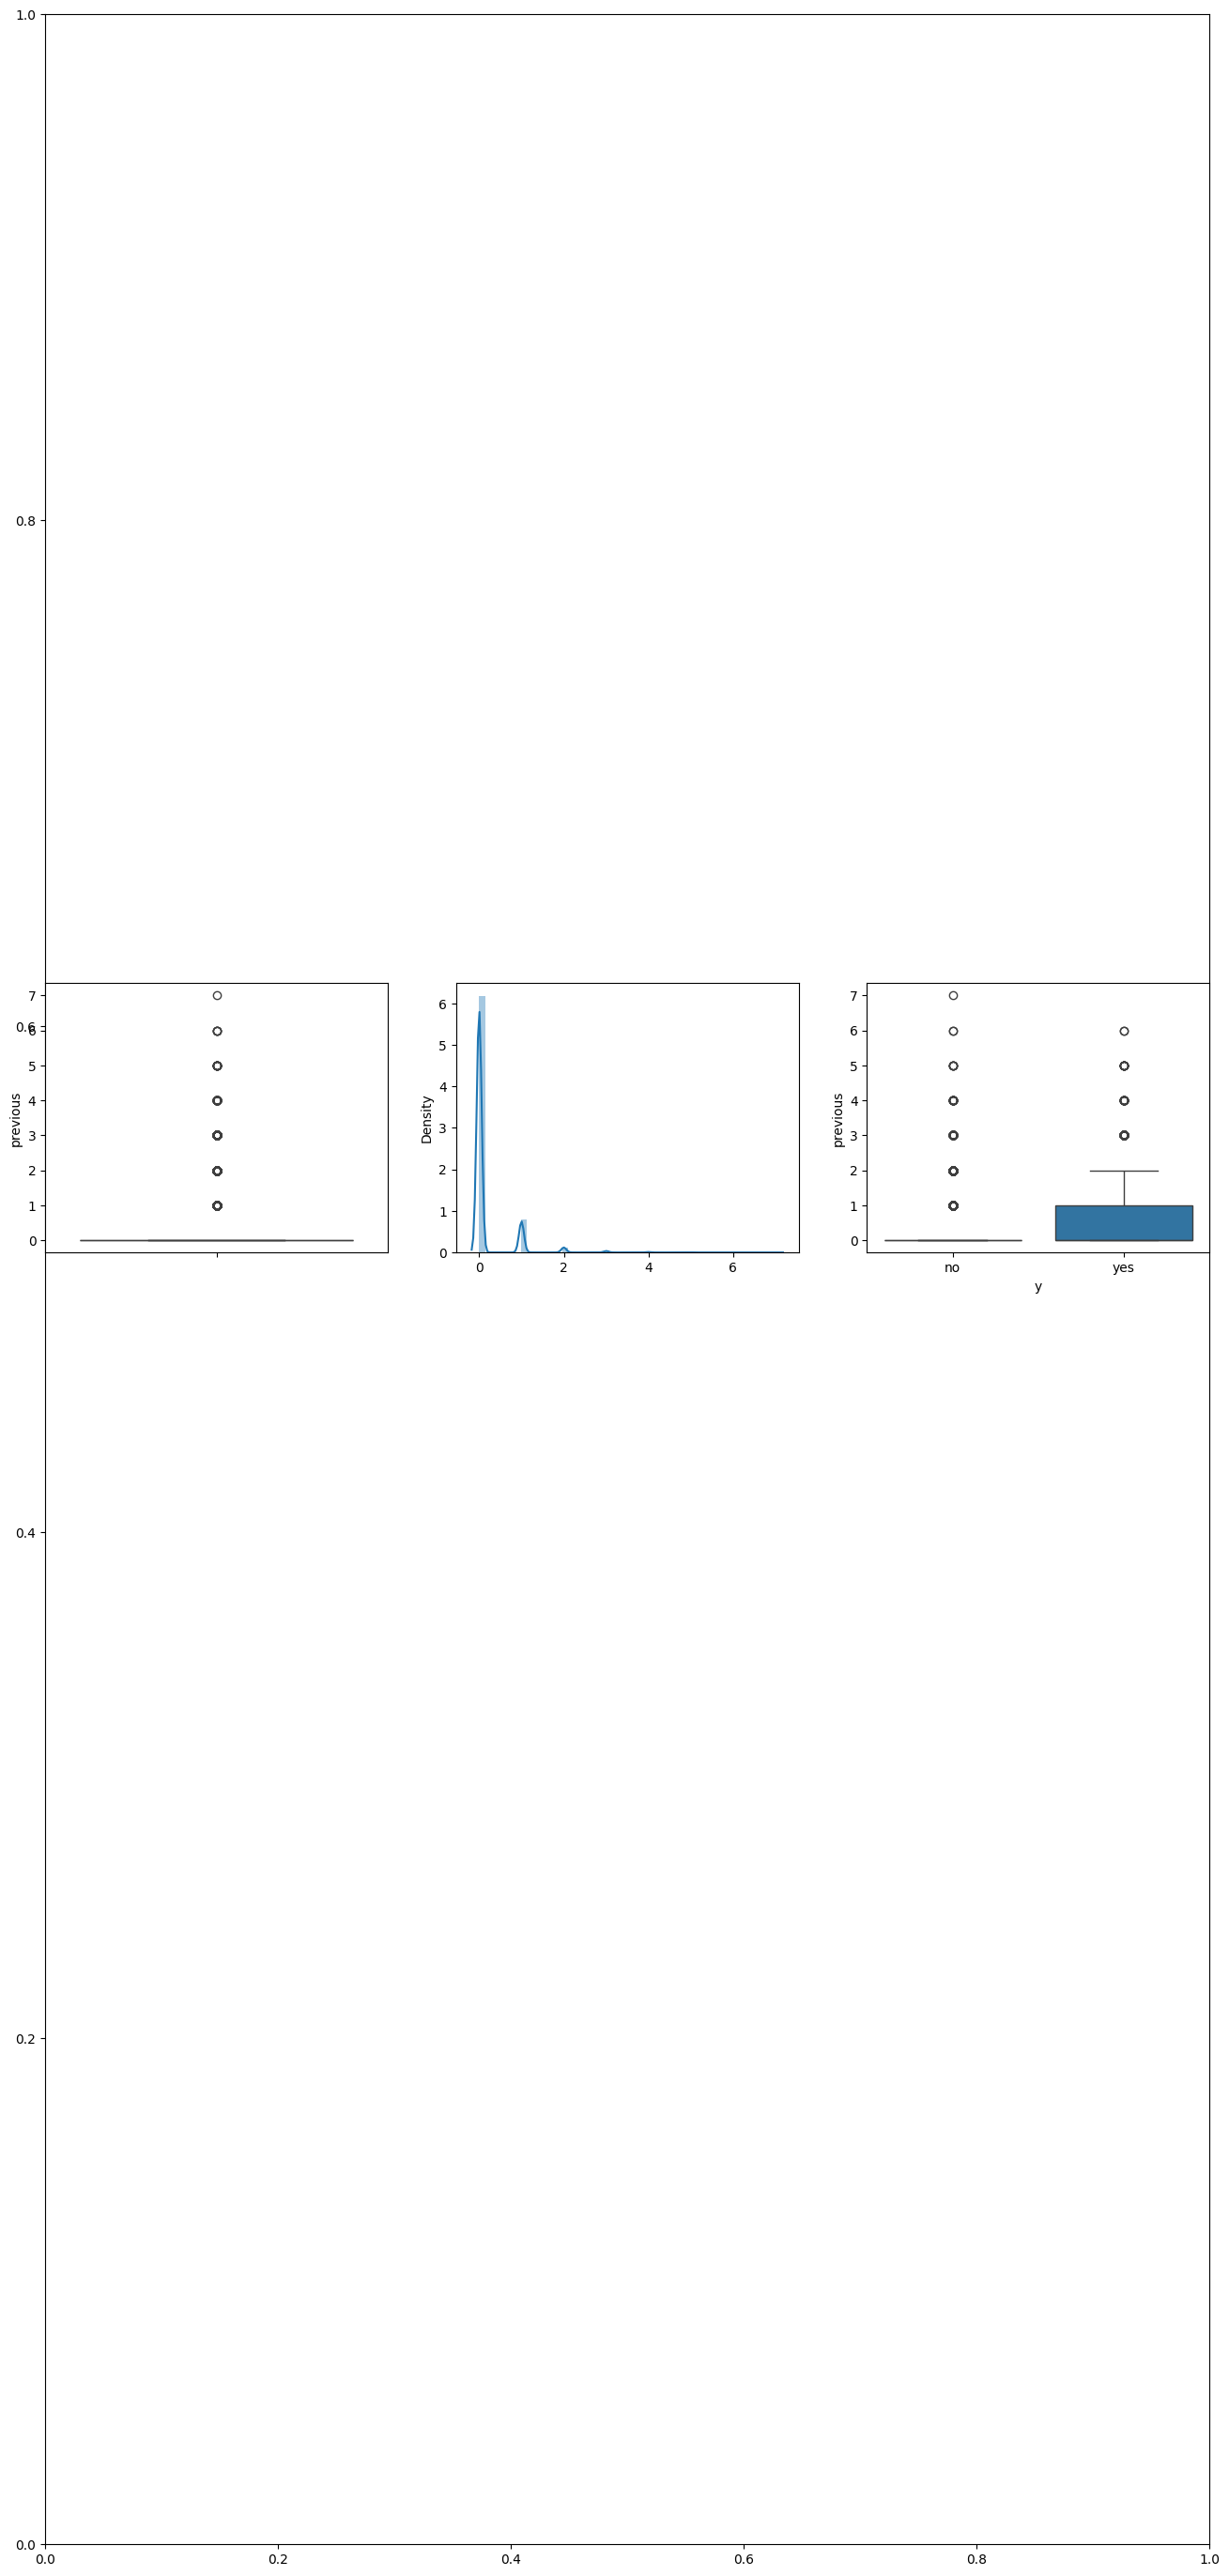

Euribor3M


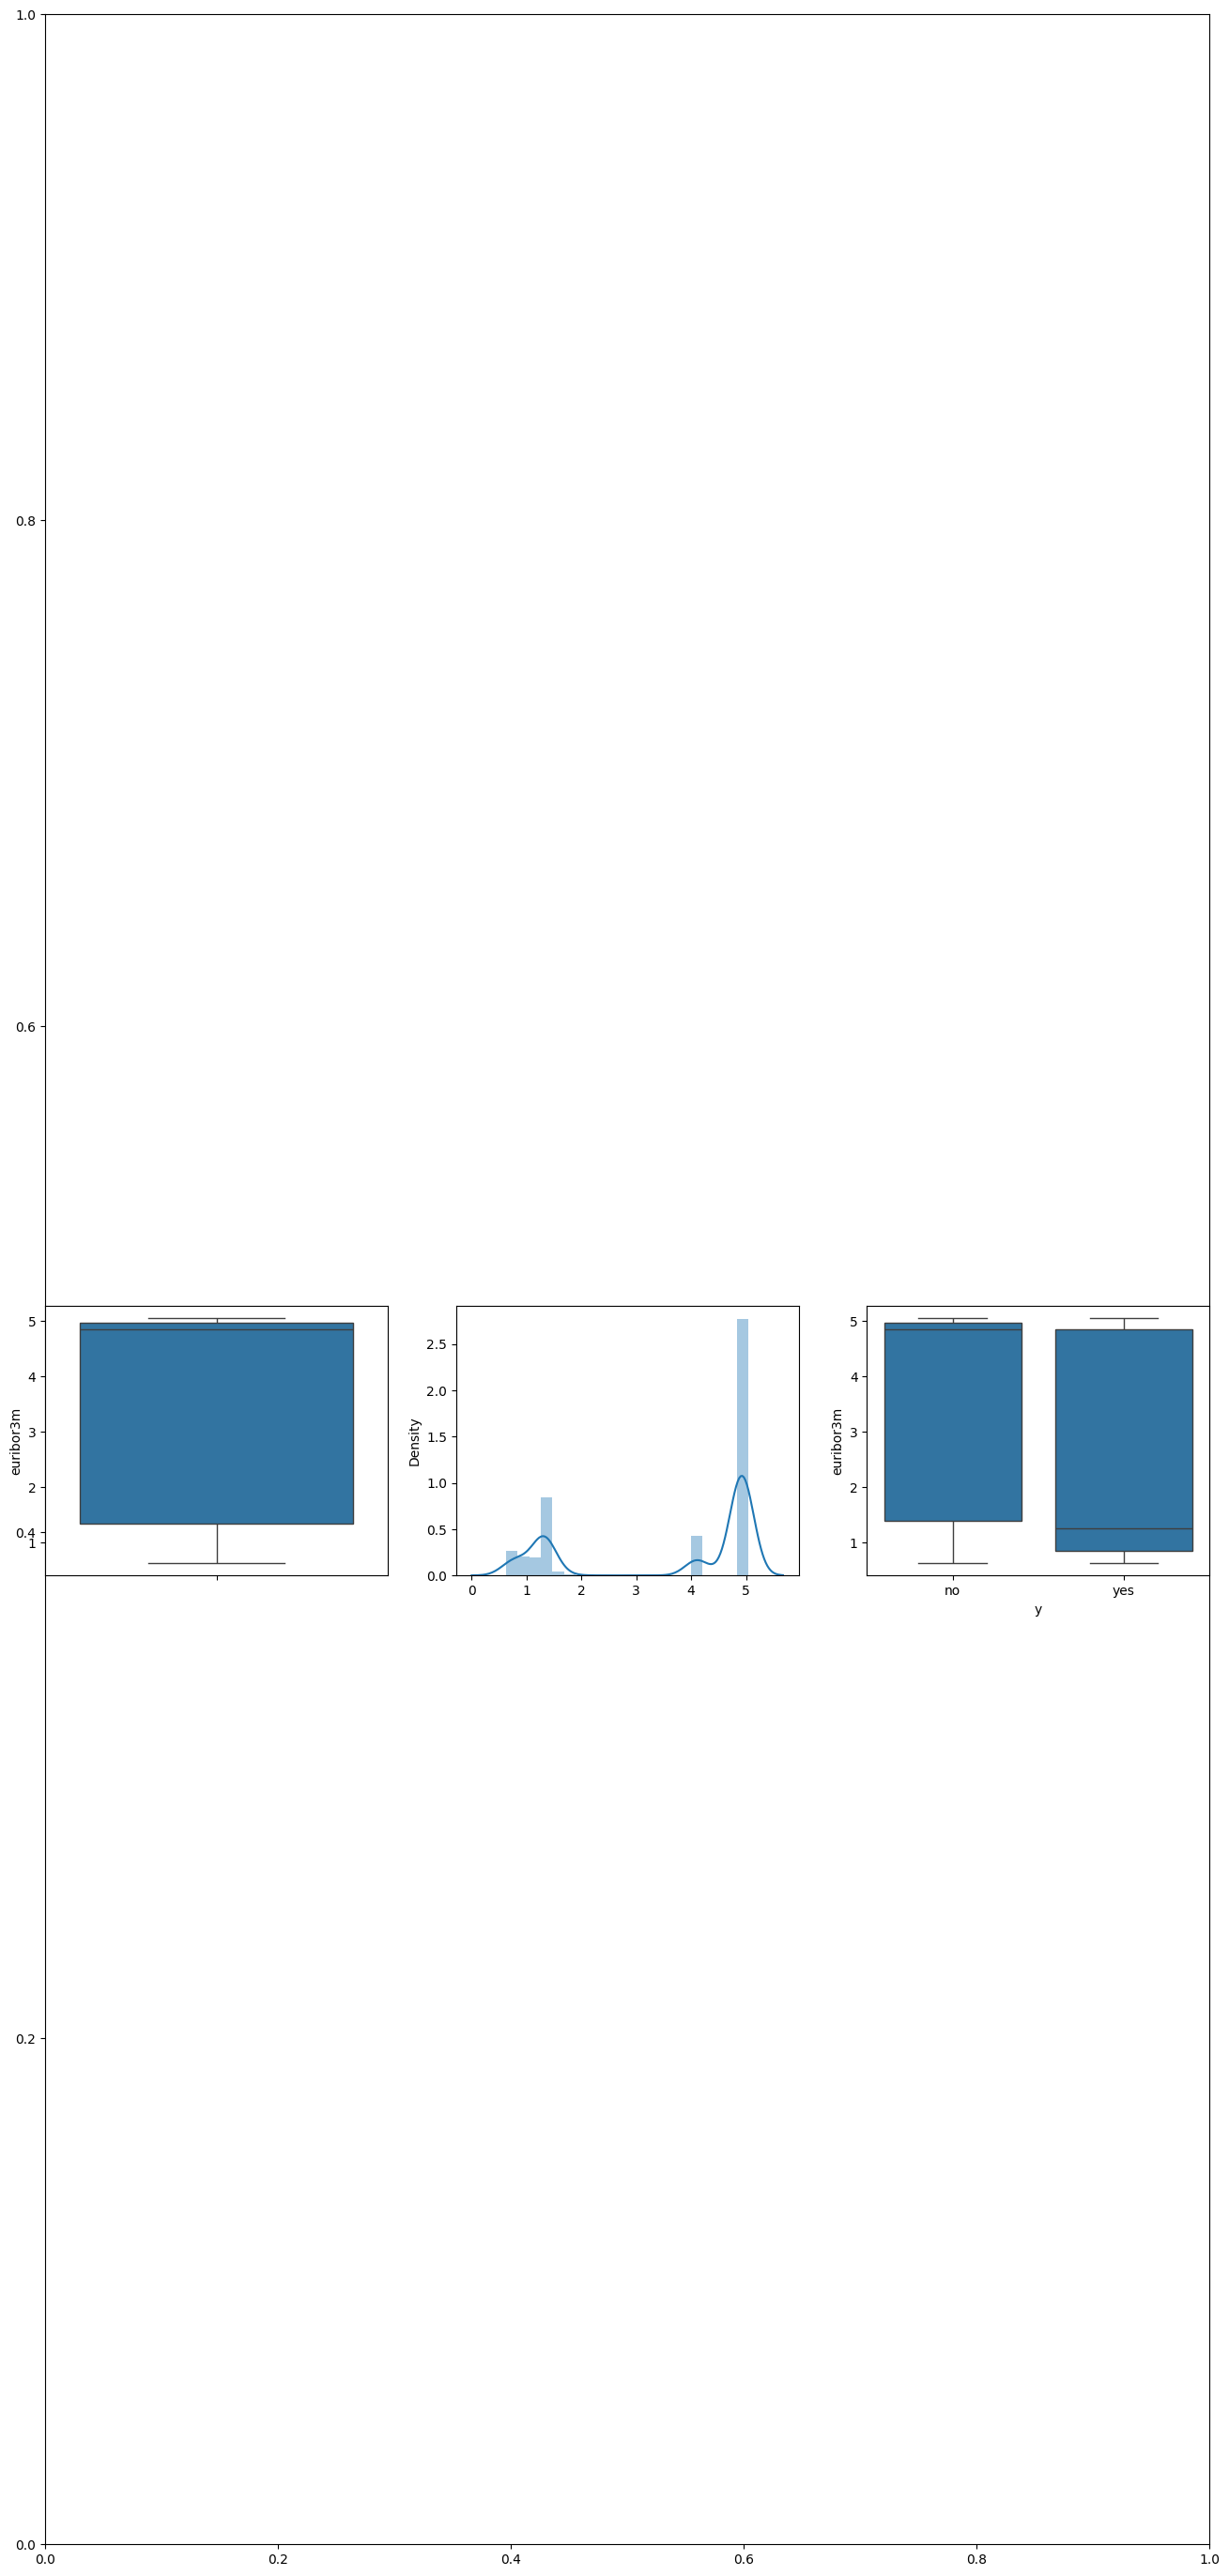

Campaign


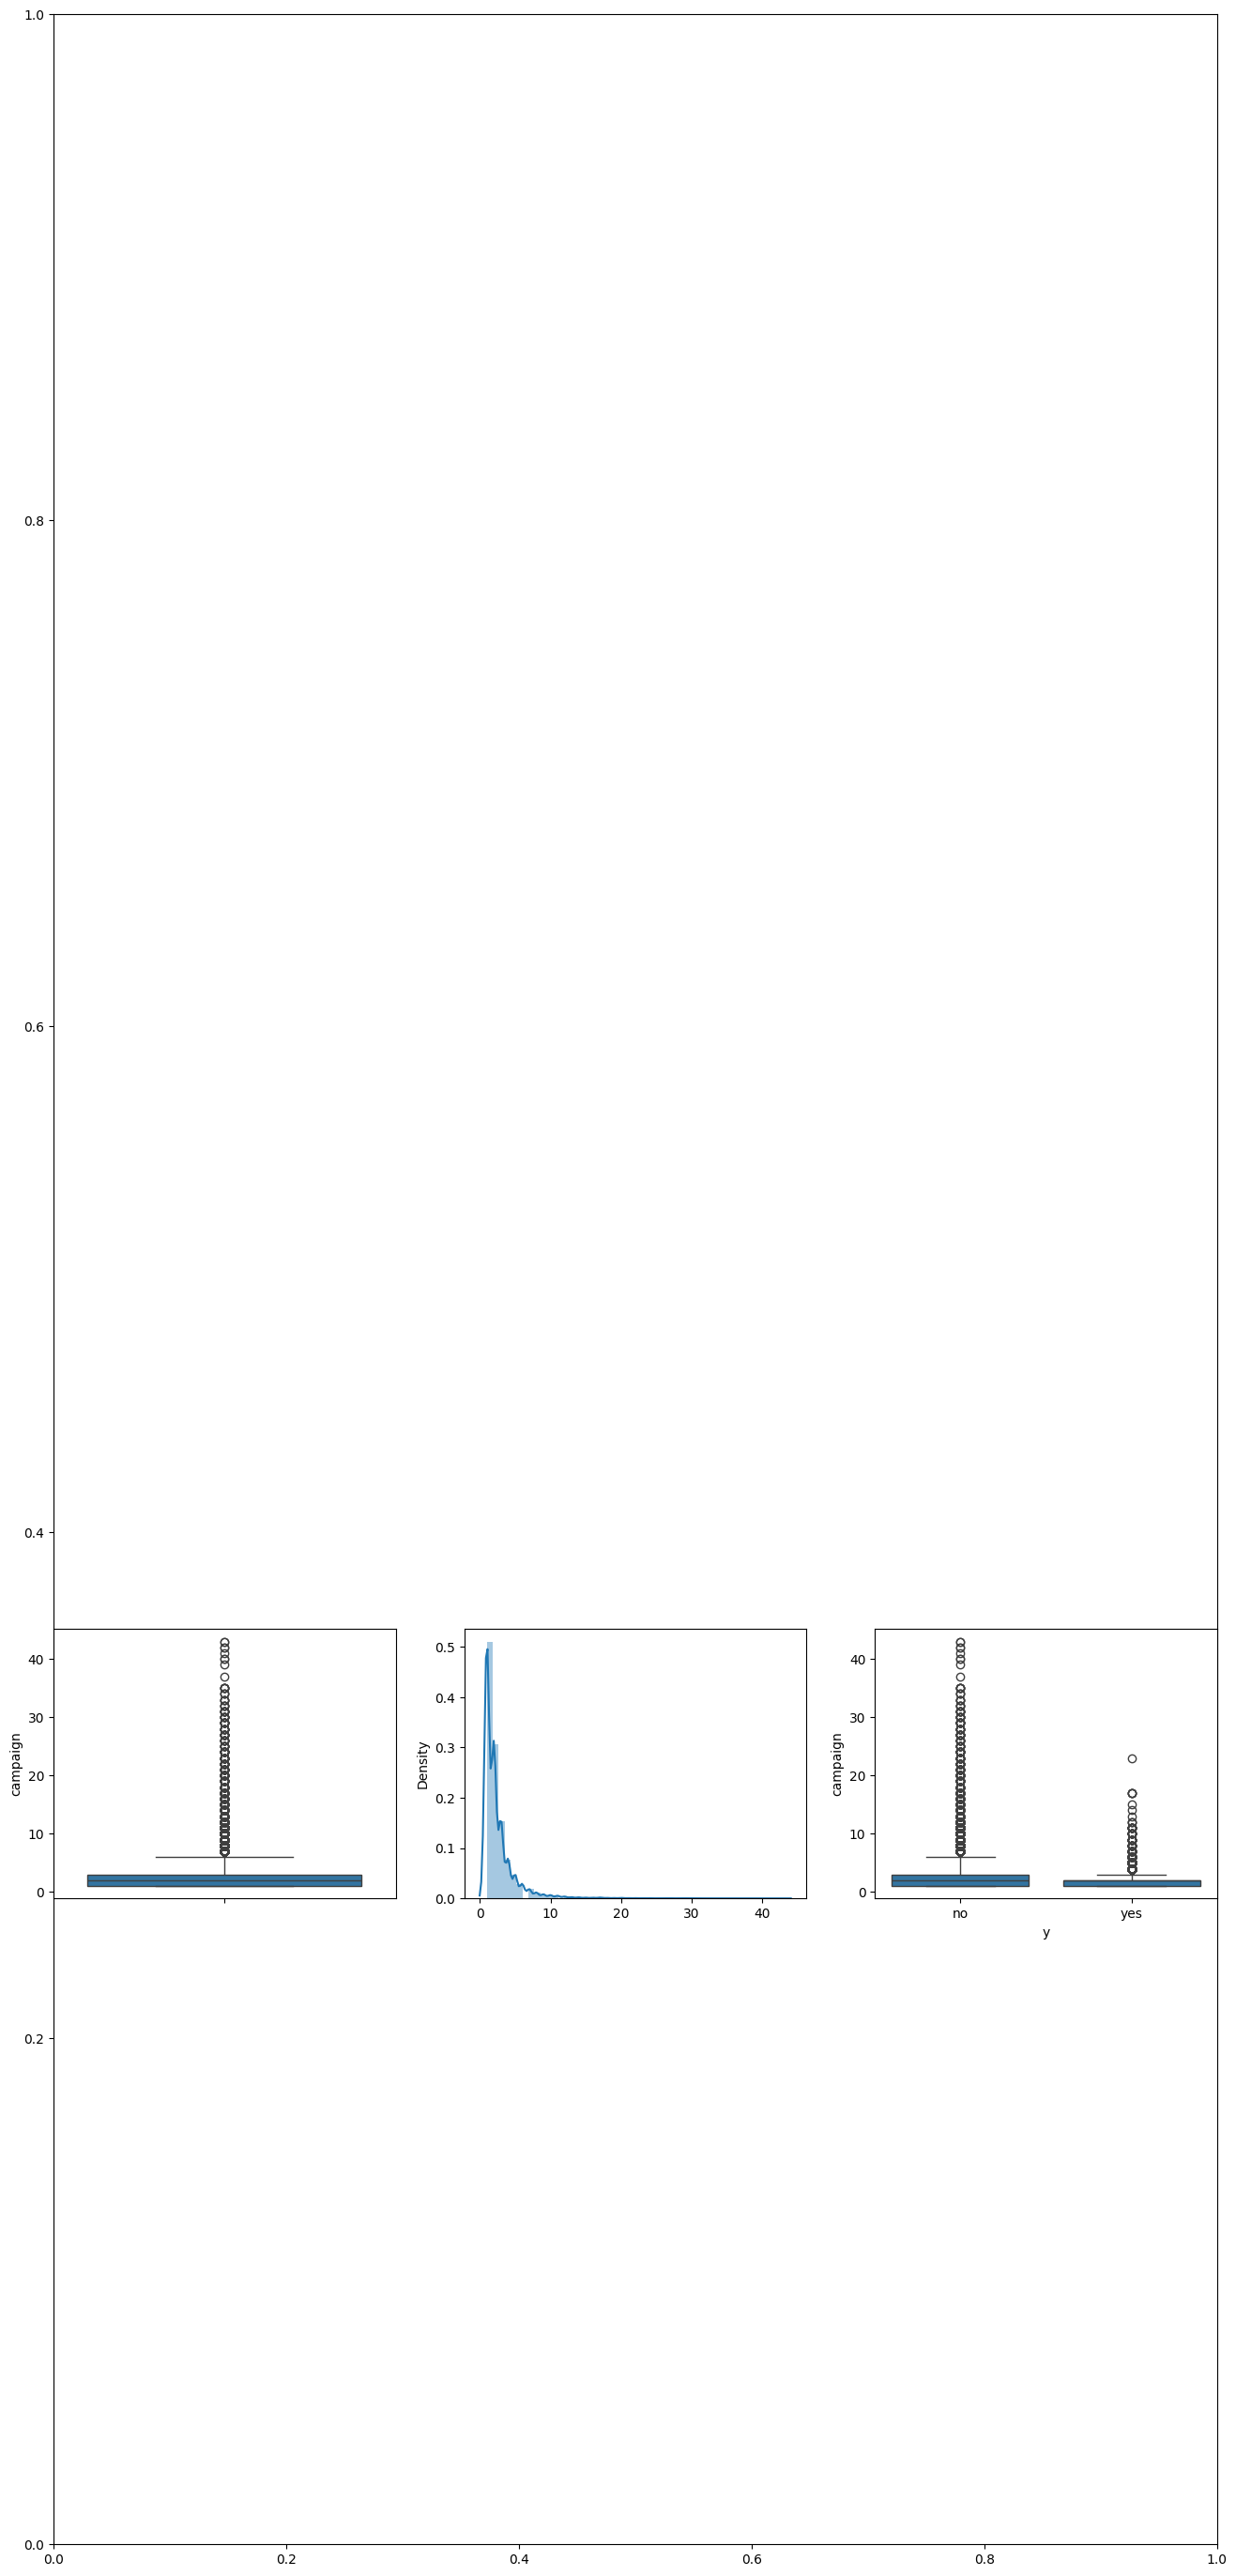

Pdays


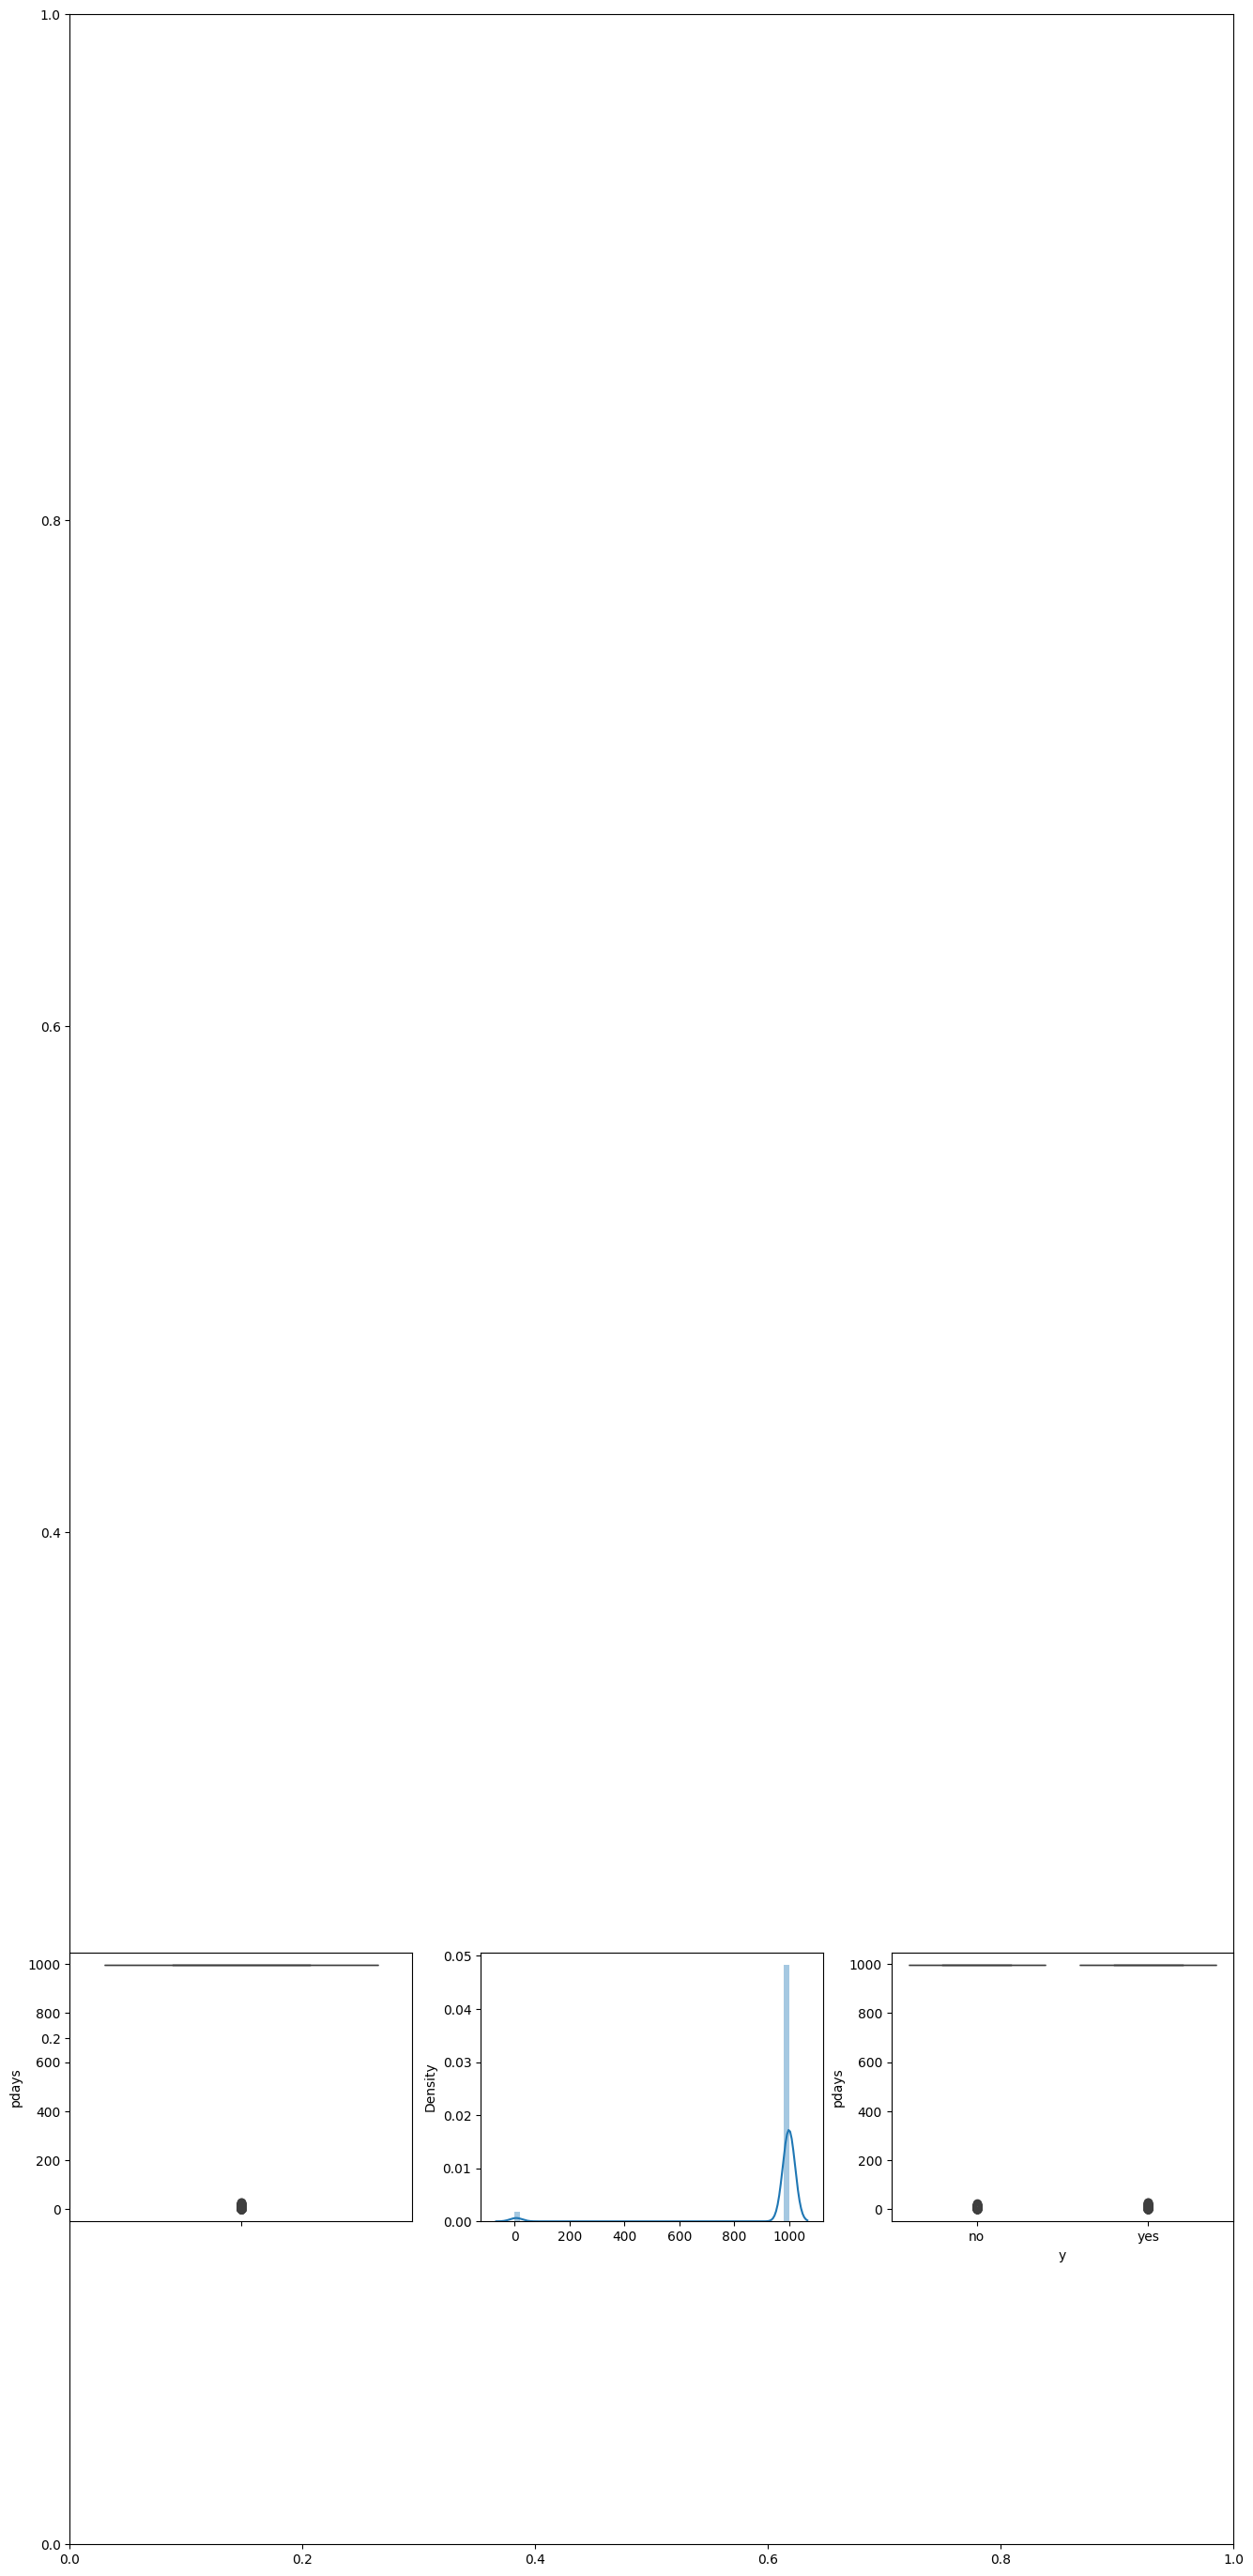

In [25]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    i += 1
    plt.show()

In [26]:
df[var_numerical].describe()

,age,cons.price.idx,cons.conf.idx,previous,euribor3m,campaign,pdays
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,93.570313,-40.541164,0.170009,3.623298,2.566662,963.531651
std,10.289488,0.576367,4.623200,0.487169,1.730226,2.767473,184.295254
min,17.000000,92.201000,-50.800000,0.000000,0.634000,1.000000,0.000000
25%,32.000000,93.075000,-42.700000,0.000000,1.344000,1.000000,999.000000
50%,38.000000,93.444000,-41.800000,0.000000,4.857000,2.000000,999.000000
75%,47.000000,93.994000,-36.400000,0.000000,4.961000,3.000000,999.000000
max,98.000000,94.767000,-26.900000,7.000000,5.045000,43.000000,999.000000


Look into 'campaign', 'age', 'previous', 'cons.conf.idx', 'pdays'

In [27]:
print(df["campaign"].quantile(0.05), len(df[df["campaign"]<df["campaign"].quantile(0.05)] ))
print(df["campaign"].quantile(0.95), len(df[df["campaign"]>df["campaign"].quantile(0.95)] ))

1.0 0
7.0 1636


In [28]:
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [29]:
df1 = df[(df["campaign"] > 8) & (df["y"] == 'yes')]
print(len(df1[['campaign', 'y']]), len(df[df["campaign"]>8]))

49 1264


In [30]:
# We will convert all the values above 10 in campaign to 10
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)

In [31]:
print(df["age"].quantile(0.05), len(df[df["age"]<df["age"].quantile(0.05)] ))
print(df["age"].quantile(0.95), len(df[df["age"]>df["age"].quantile(0.95)] ))

26.0 1484
58.0 1435


In [32]:
print(df["previous"].quantile(0.05), len(df[df["previous"]<df["previous"].quantile(0.05)] ))
print(df["previous"].quantile(0.95), len(df[df["previous"]>2] ))

0.0 0
1.0 273


In [33]:
for i in range(1, max(df["previous"])+1):
    print(i, end = " ")
    df1 = df[(df["previous"] >= i) & (df["y"] == 'yes')]
    print(len(df1[['previous', 'y']]), len(df[df["previous"]>= i]))

1 1336 5179
2 466 945
3 160 273
4 43 78
5 13 21
6 2 5
7 0 1


In [34]:
# We will convert all the values above 2 in previous to 2
df["previous"] = df["previous"].apply(lambda x: 2 if x >= 2 else x)

In [35]:
print(df["pdays"].quantile(0.05), len(df[df["pdays"]<df["pdays"].quantile(0.05)] ))
print(df["pdays"].quantile(0.95), len(df[df["pdays"]>df["pdays"].quantile(0.95)] ))

999.0 1366
999.0 0


In [36]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


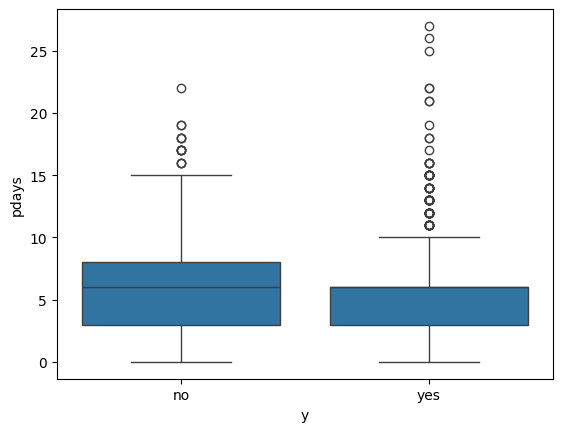

In [37]:
# Look into the pdays values which are less than 999
df1 = df[~(df["pdays"] >= 999)]
sns.boxplot(x = df1["y"], y = df1['pdays'])
plt.show()

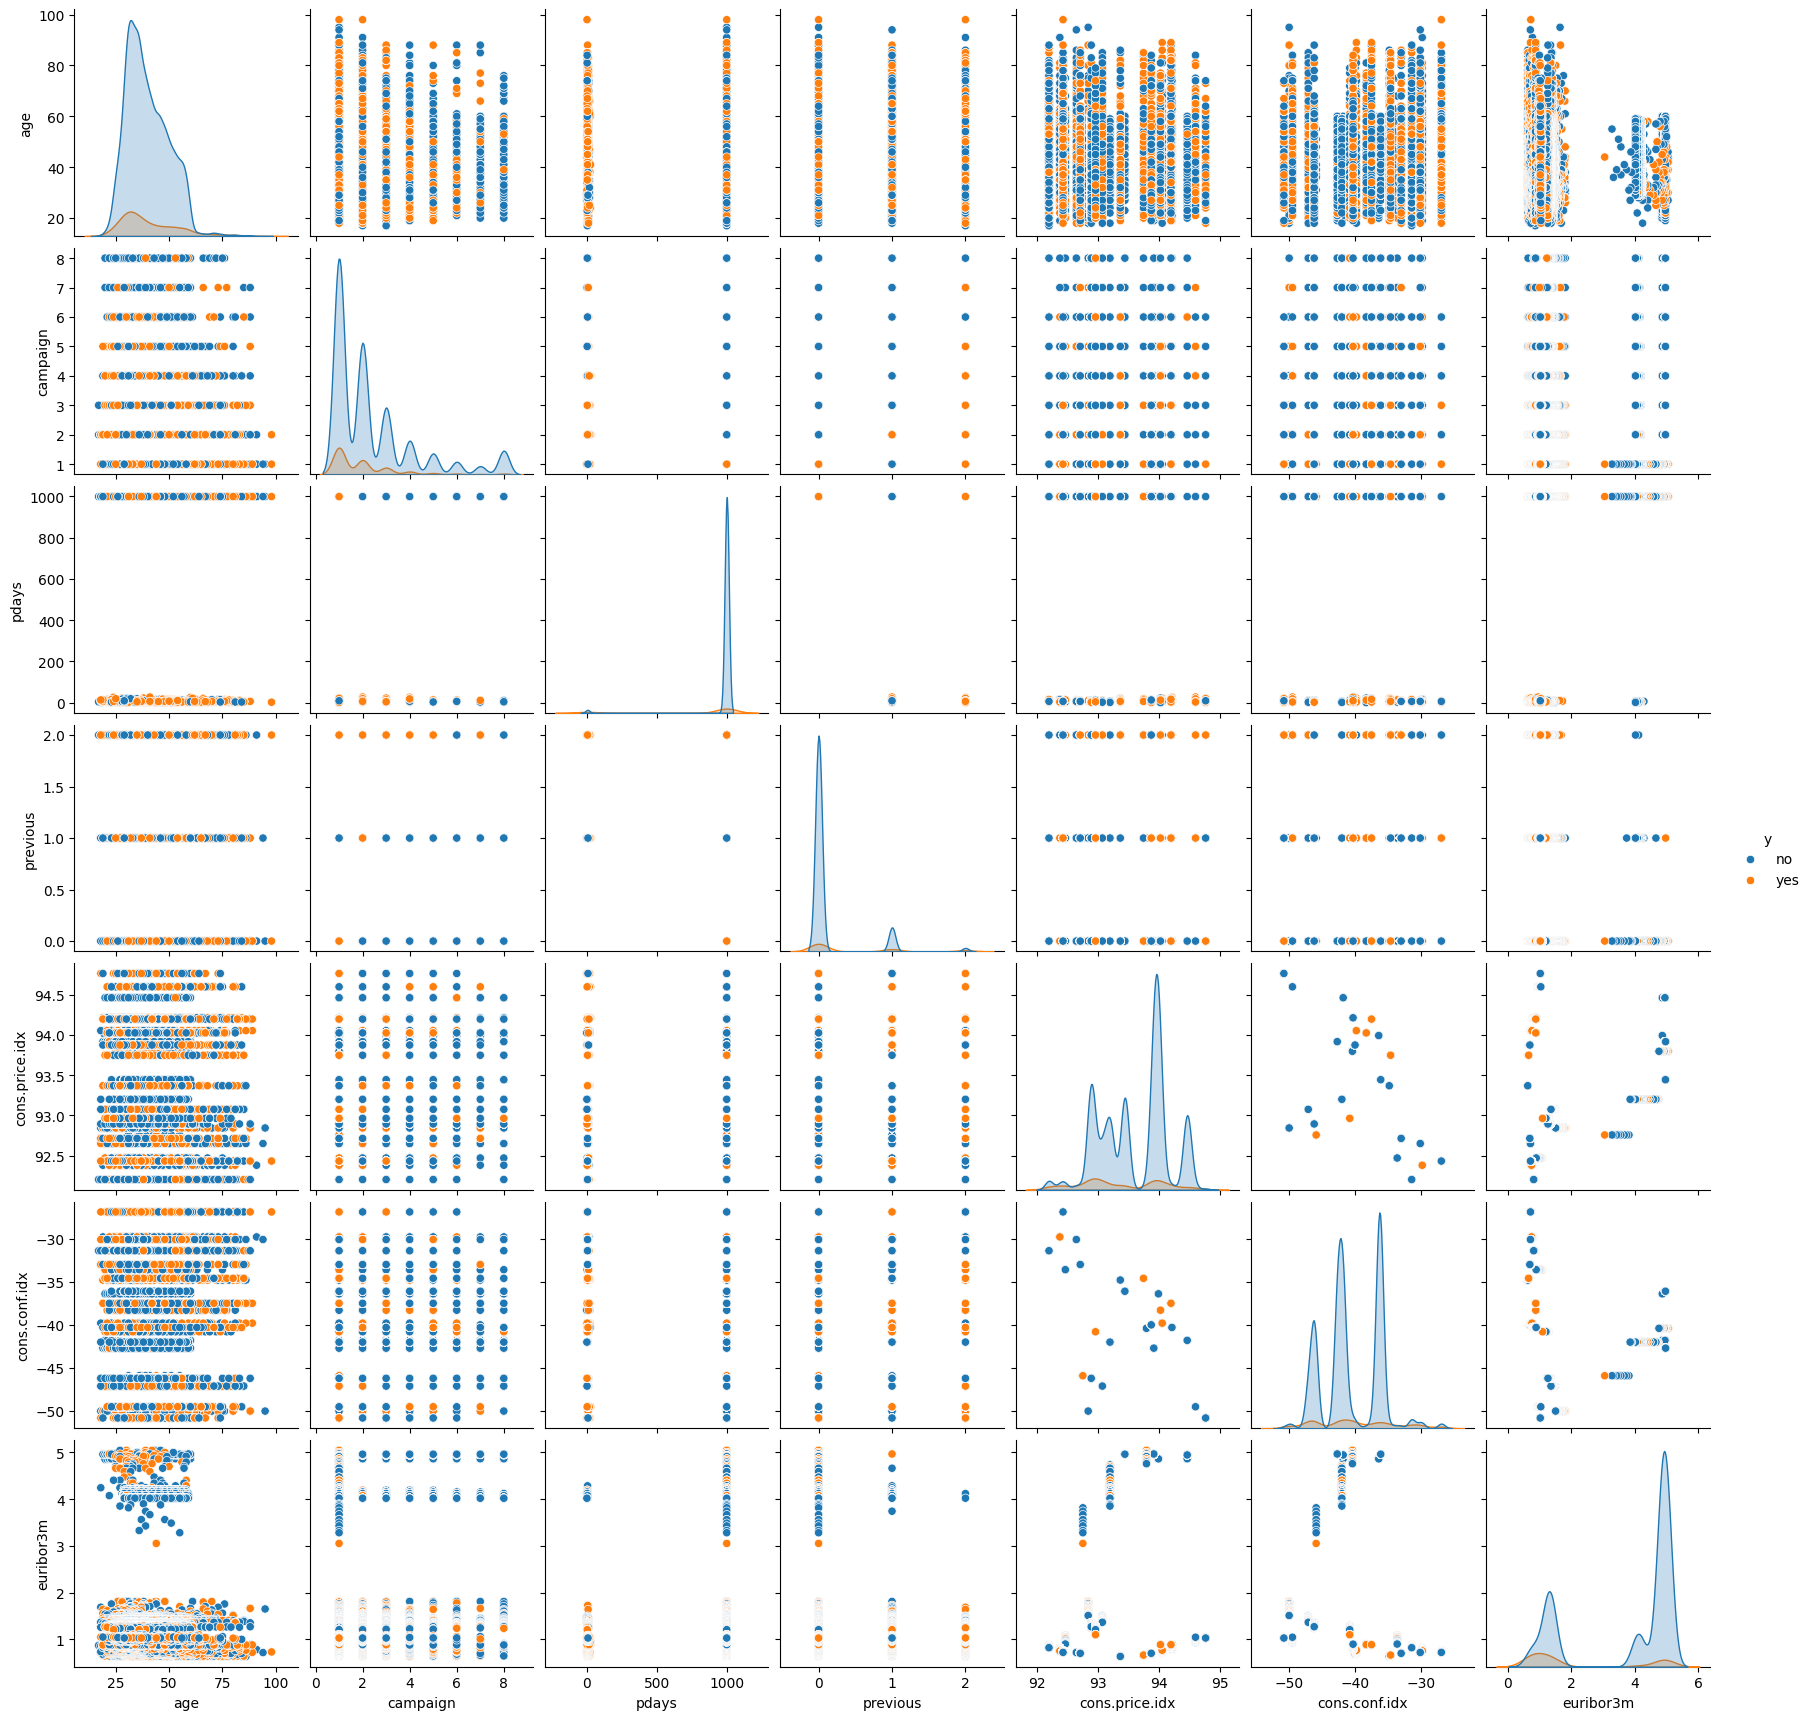

In [38]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

### Insights from continuous variables

1. **Campaign**: If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
2. **Consumer price index**: If this value is high then probability of client not subscribing is slightly higher.
3. **Previous**: If we contact client before a campaign then there is high chances that client will subscribe. We converted all the values above 2 to 2 based on the given data
4. **Euribor 3 month rate**: If this rate is high there is high chances of clients not subscribing to term deposit.
5. **Pdays**: If we start contacting client 1 month before campaign there is high probability of that client subscribing.

Therefore, we will drop 'campaign' as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.

In [39]:
df.drop(['campaign'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['campaign']))

In [40]:
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

We will drop the missing values

In [41]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['marital', 'day_of_week', 'education', 'housing', 'loan', 'job', 'month', 'contact', 'poutcome']
6 ['age', 'cons.price.idx', 'cons.conf.idx', 'previous', 'euribor3m', 'pdays']


In [42]:
print(df["loan"].value_counts())
print(df["housing"].value_counts())
print(df["contact"].value_counts())
print(df["y"].value_counts())

loan
no     32286
yes     5959
Name: count, dtype: int64
housing
yes    20578
no     17667
Name: count, dtype: int64
contact
cellular     24441
telephone    13804
Name: count, dtype: int64
y
no     33987
yes     4258
Name: count, dtype: int64


In [43]:
varlist = ['loan', 'housing', 'y']

df[varlist] = df[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

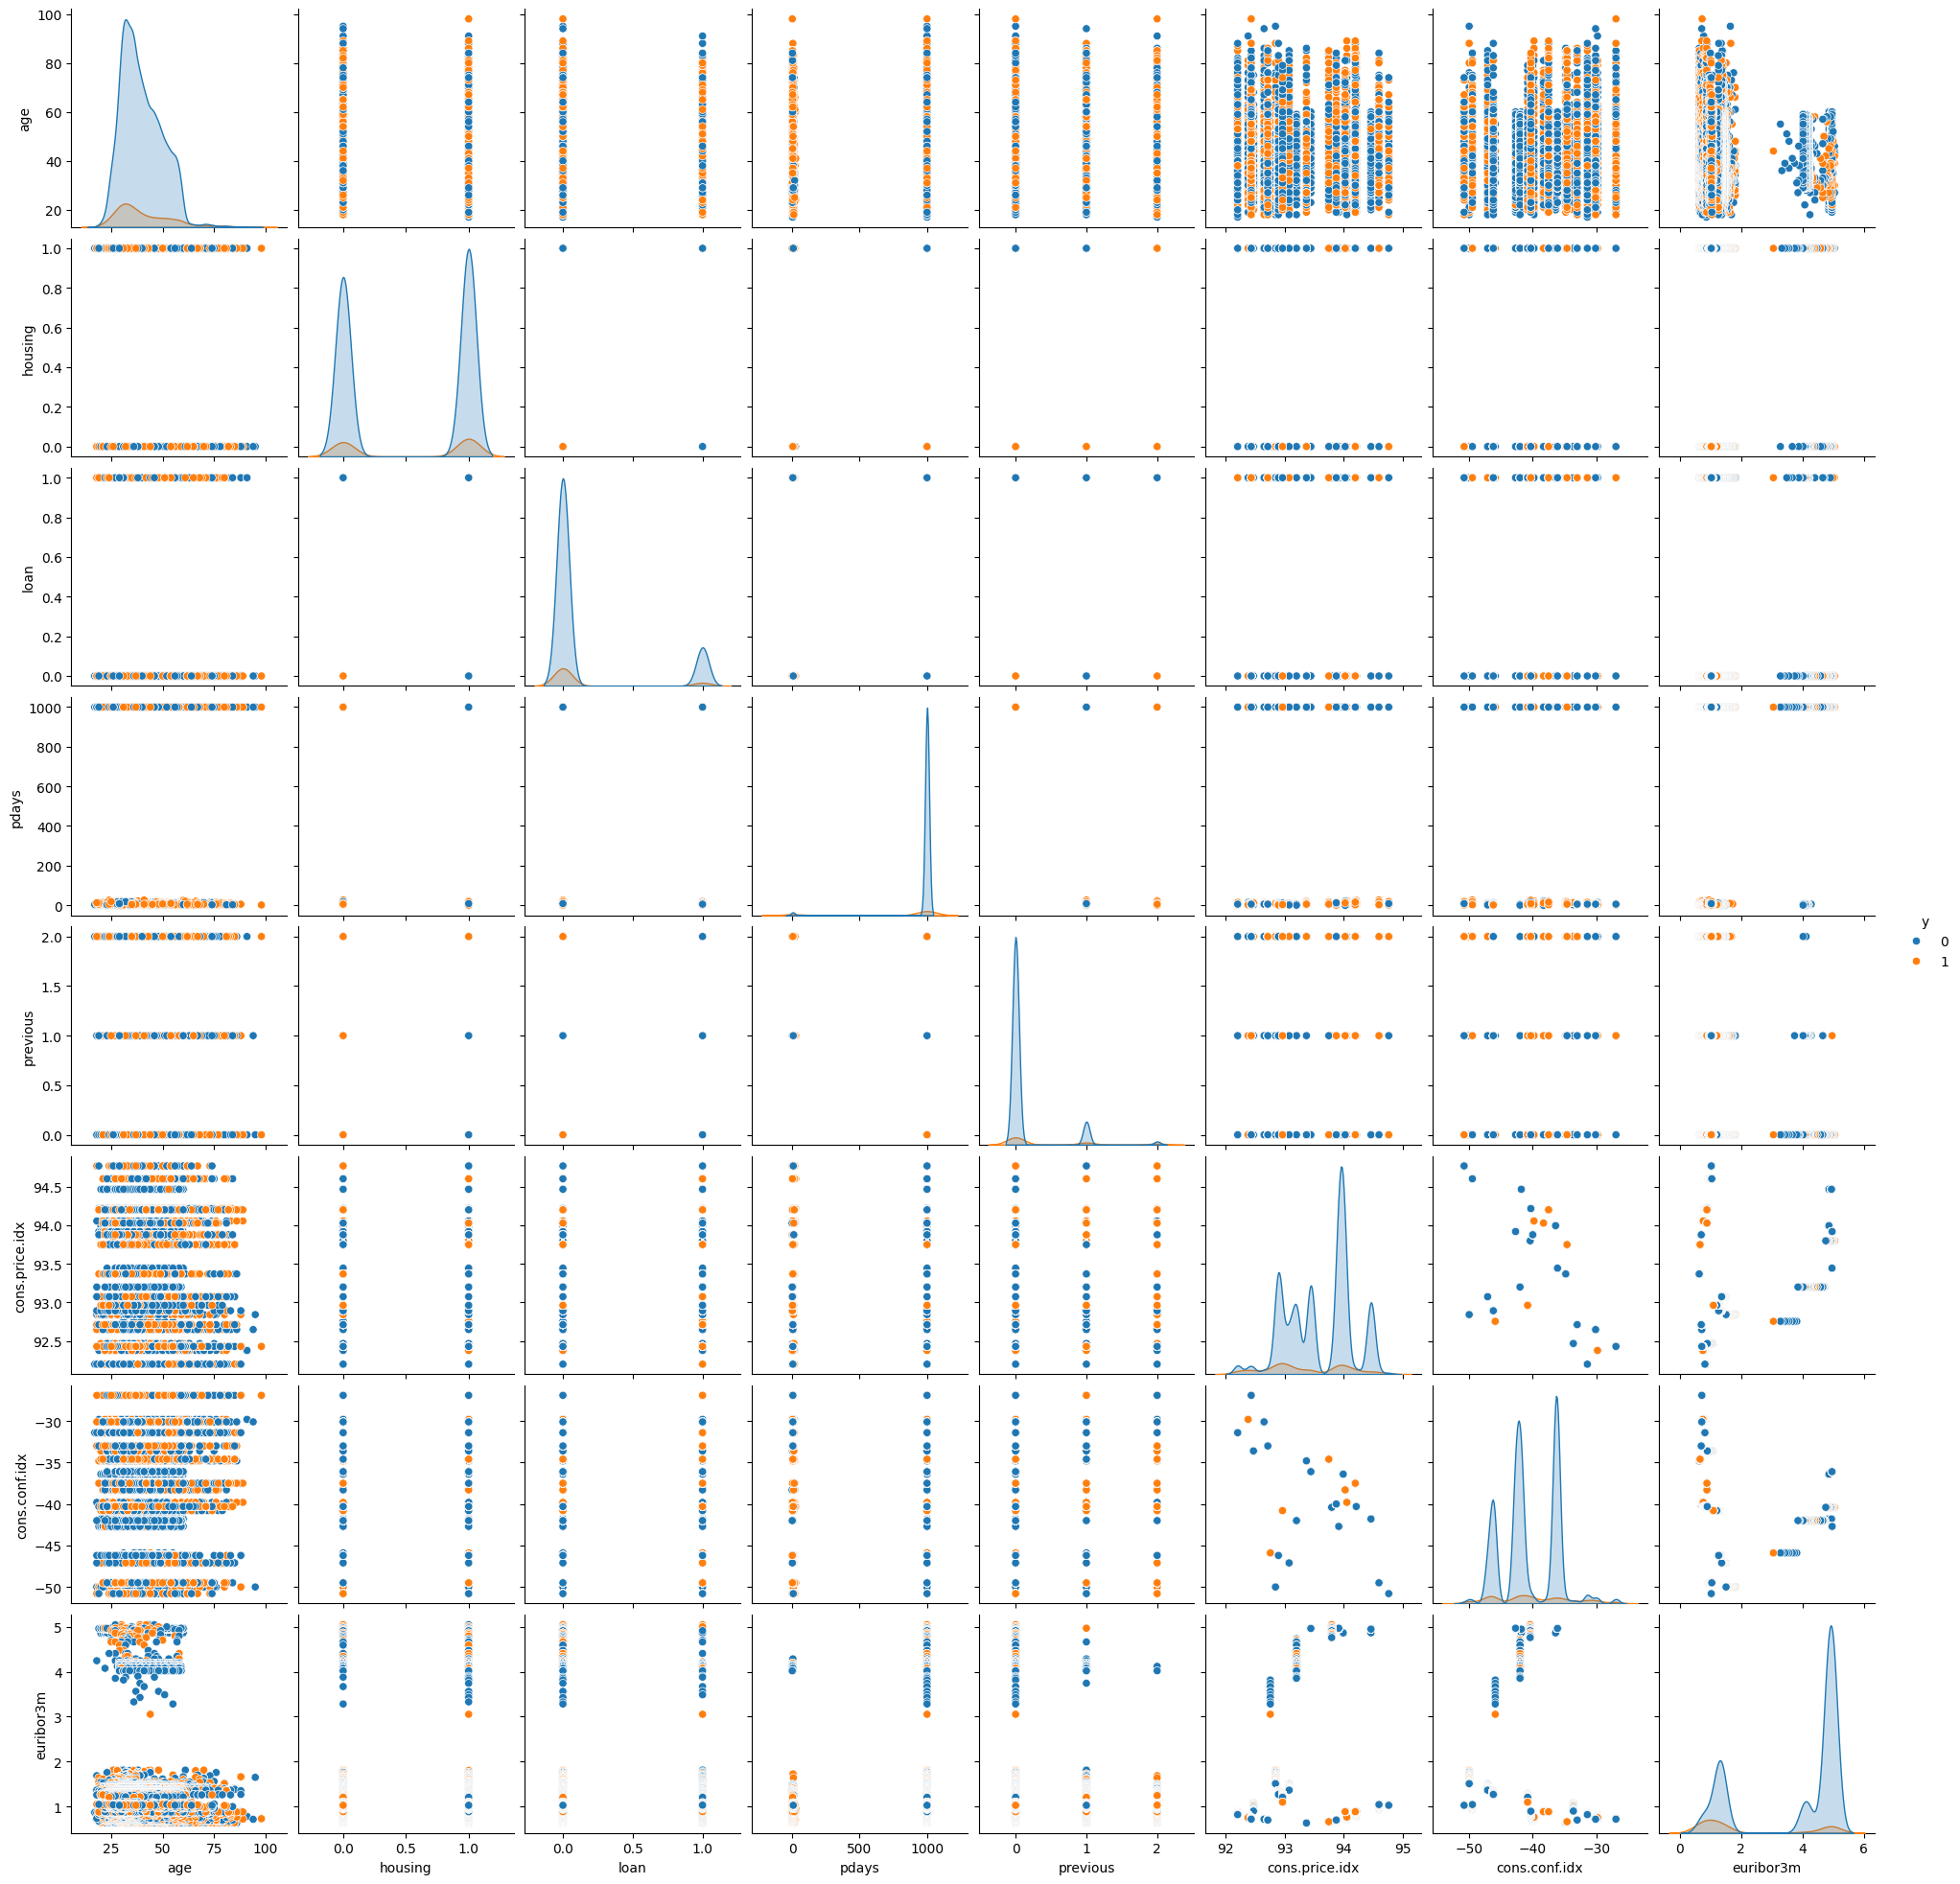

In [44]:
# visualizing streamlined numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

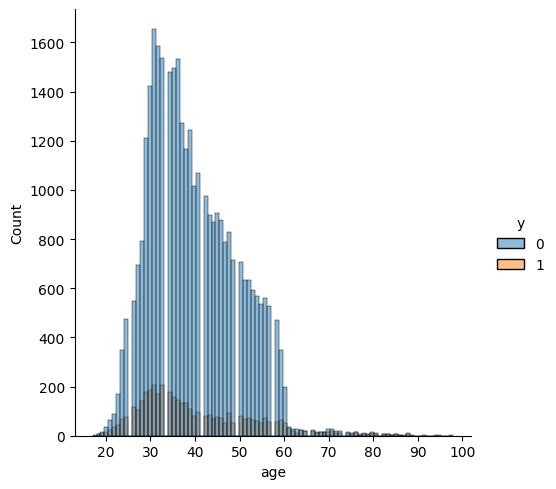

In [45]:
sns.displot(x = 'age', hue='y', data=df)
plt.show()

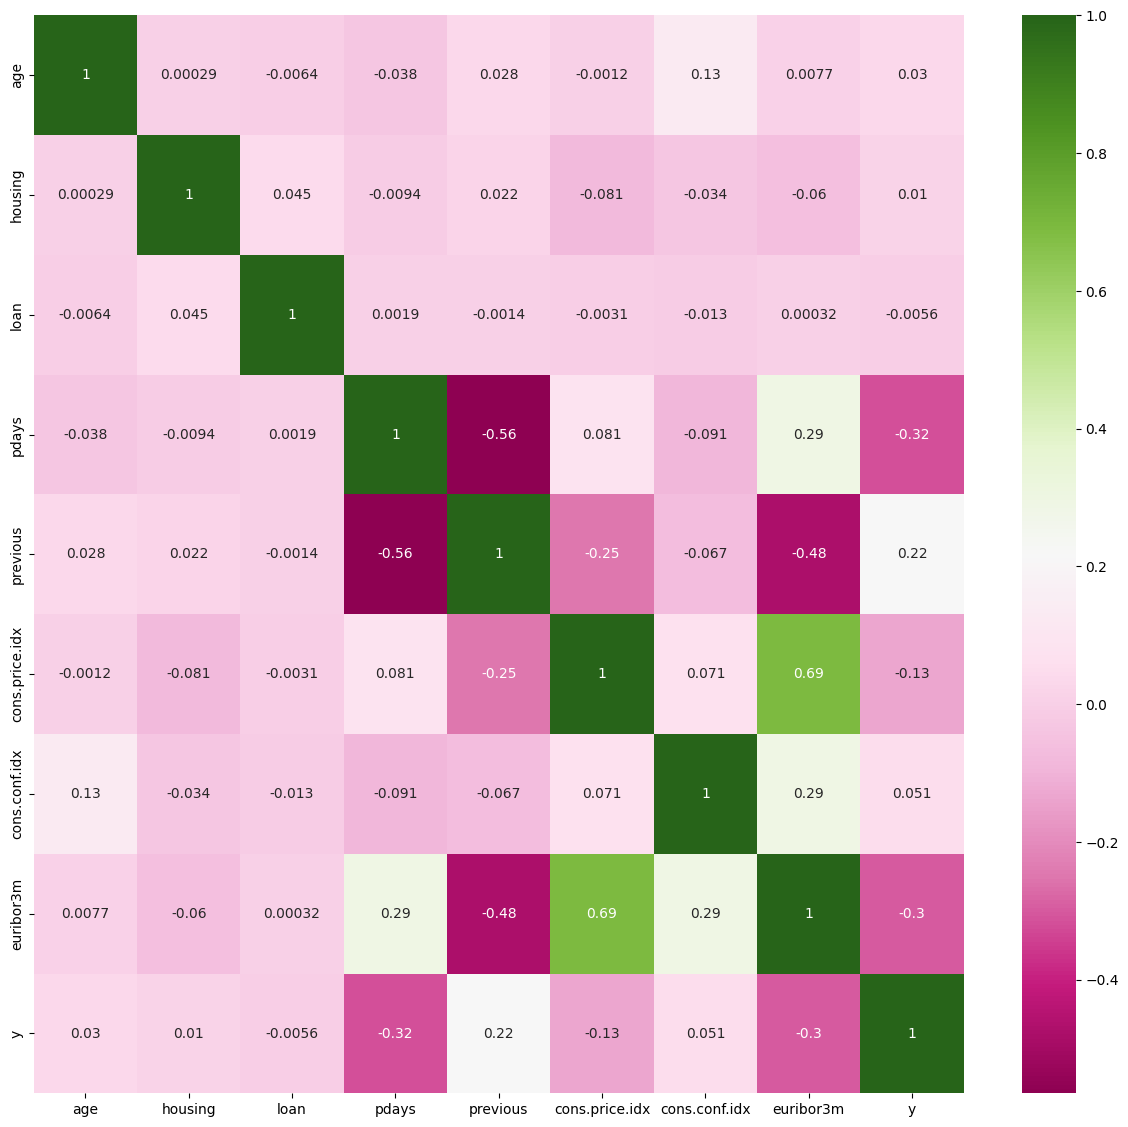

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 14))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PiYG')
plt.show()



We now get the dummy variables for contact, poutcome, job, month, marital, day_of_week, education
We should drop the first column from  using 'drop_first = True' as first column can be derived using other columns 

In [47]:
#dropping redundant column
contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [48]:
# Concat the dummy columns to the dataframe
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,999,...,True,False,False,False,False,False,False,False,False,False
1,57,services,married,high.school,0,0,telephone,may,mon,999,...,True,False,False,False,False,False,True,False,False,False
2,37,services,married,high.school,1,0,telephone,may,mon,999,...,True,False,False,False,False,False,True,False,False,False
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,999,...,True,False,False,False,True,False,False,False,False,False
4,56,services,married,high.school,0,1,telephone,may,mon,999,...,True,False,False,False,False,False,True,False,False,False


In [49]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,999,0,93.994,-36.4,4.857,0,True,...,True,False,False,False,False,False,False,False,False,False
1,57,0,0,999,0,93.994,-36.4,4.857,0,True,...,True,False,False,False,False,False,True,False,False,False
2,37,1,0,999,0,93.994,-36.4,4.857,0,True,...,True,False,False,False,False,False,True,False,False,False
3,40,0,0,999,0,93.994,-36.4,4.857,0,True,...,True,False,False,False,True,False,False,False,False,False
4,56,0,1,999,0,93.994,-36.4,4.857,0,True,...,True,False,False,False,False,False,True,False,False,False


In [50]:
df.columns

Index(['age', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'telephone', 'nonexistent',
       'success', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed', 'basic.6y',
       'basic.9y', 'high.school', 'illiterate', 'professional.course',
       'university.degree'],
      dtype='object')

In [51]:
len(df.columns)

43

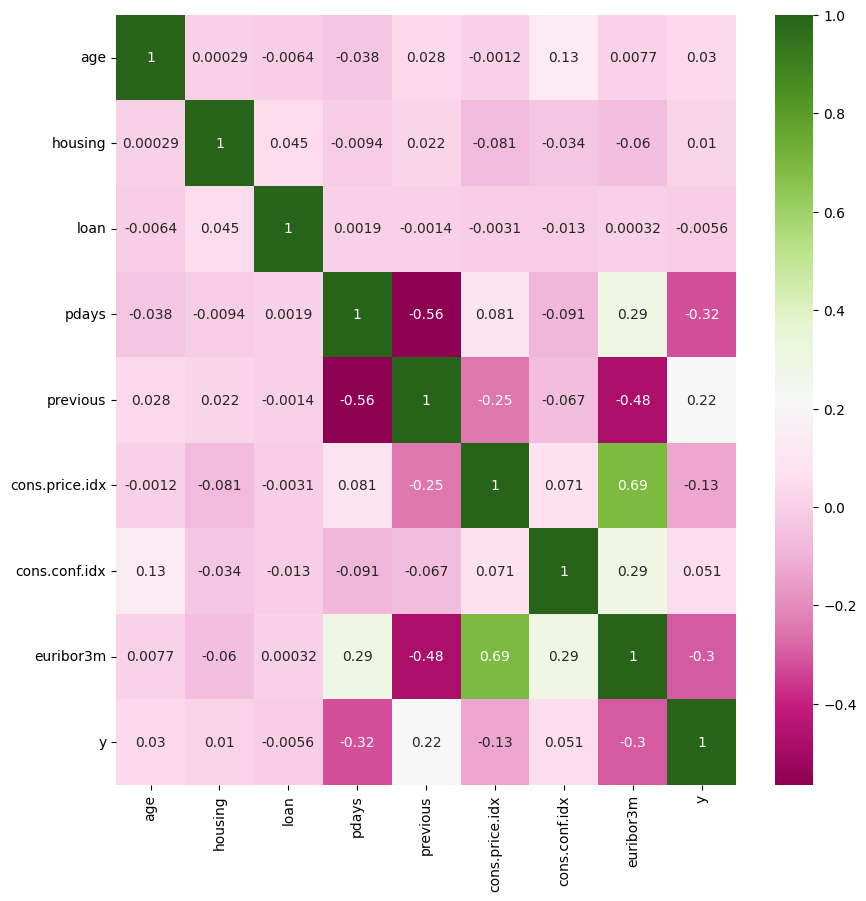

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PiYG')
plt.show()


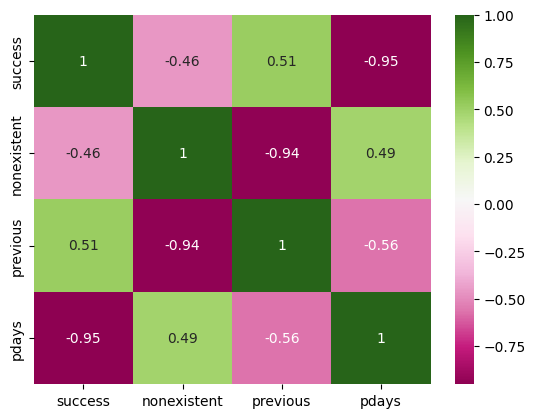

In [53]:
sns.heatmap(df[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='PiYG')
plt.show()

#### Negative Correlation:
1. Previous v/s Nonexistent
2. Pdays v/s Success

In [54]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [55]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

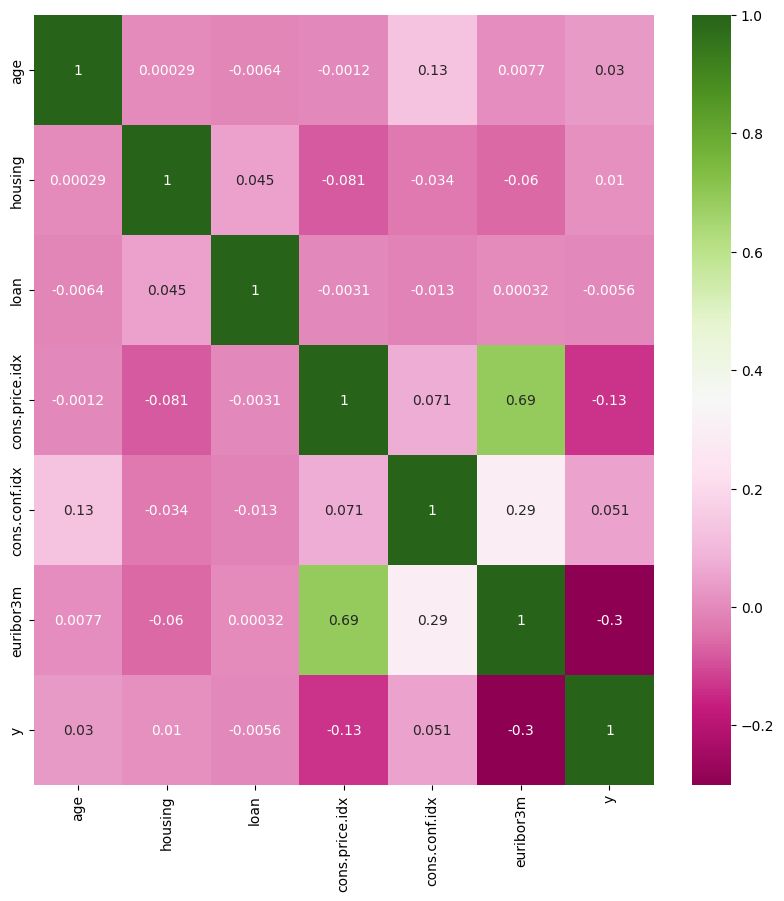

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PiYG')
plt.show()


In [57]:
df.corr()['y']

age                    0.030130
housing                0.009996
loan                  -0.005603
cons.price.idx        -0.133084
cons.conf.idx          0.051424
euribor3m             -0.300580
y                      1.000000
telephone             -0.140866
nonexistent           -0.184489
success                0.311555
blue-collar           -0.071404
entrepreneur          -0.015897
housemaid             -0.006232
management             0.000090
retired                0.089646
self-employed         -0.001888
services              -0.032759
student                0.082182
technician            -0.006091
unemployed             0.016334
aug                   -0.012077
dec                    0.075847
jul                   -0.030556
jun                   -0.007129
mar                    0.144351
may                   -0.104725
nov                   -0.013458
oct                    0.142853
sep                    0.123514
married               -0.040845
single                 0.050106
mon     

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  bool   
 8   nonexistent          38245 non-null  bool   
 9   success              38245 non-null  bool   
 10  blue-collar          38245 non-null  bool   
 11  entrepreneur         38245 non-null  bool   
 12  housemaid            38245 non-null  bool   
 13  management           38245 non-null  bool   
 14  retired              38245 non-null  bool   
 15  self-employed        38245 non-null  bool

## Use any prediction algorithm based upon the EDA

In [59]:
from sklearn.model_selection import train_test_split

We will divide the training and testing set in 80% and 20% respectively
We used random_state = 100 so that everytime we run it we will have same set of training and testing set

In [60]:
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [61]:
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["y"].value_counts())
print("Test Target Label counts: ")
print(df_test["y"].value_counts())

Train Dataset: 30596 Test Dataset: 7649
Train Target Label counts: 
y
0    27144
1     3452
Name: count, dtype: int64
Test Target Label counts: 
y
0    6843
1     806
Name: count, dtype: int64


### Rescaling the continuous variables
Our data is not normally distributed so we will use MinMaxScaler. It can also handle some of the outliers which we have in our data.

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
# Fit and Transform the data
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

In [65]:
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [66]:
df_train.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
17301,0.098765,1,1,0.669135,0.338912,0.981183,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
26425,0.407407,1,0,0.389322,0.368201,0.780322,0,False,True,False,...,False,True,False,False,False,False,False,False,False,True
38271,0.111111,1,0,0.089634,1.000000,0.024484,0,False,False,False,...,False,False,True,False,False,True,False,False,False,False
24709,0.382716,1,0,0.389322,0.368201,0.806393,0,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2160,0.148148,1,0,0.698753,0.602510,0.957379,0,True,True,False,...,True,False,False,False,False,False,True,False,False,False


In [67]:
df_test.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
19269,0.407407,0,1,0.484412,0.615063,0.982317,0,False,True,False,...,False,False,False,True,False,False,True,False,False,False
17957,0.358025,0,0,0.669135,0.338912,0.980957,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
22711,0.506173,0,0,0.484412,0.615063,0.981637,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
20420,0.395062,1,0,0.484412,0.615063,0.982090,0,False,True,False,...,False,False,True,False,True,False,False,False,False,False
38658,0.246914,0,0,0.174591,0.866109,0.019270,0,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  bool   
 8   nonexistent          38245 non-null  bool   
 9   success              38245 non-null  bool   
 10  blue-collar          38245 non-null  bool   
 11  entrepreneur         38245 non-null  bool   
 12  housemaid            38245 non-null  bool   
 13  management           38245 non-null  bool   
 14  retired              38245 non-null  bool   
 15  self-employed        38245 non-null  bool

In [69]:
# Divide the train data into X and y
y_train = df_train.pop('y')
X_train = df_train

In [70]:
# Divide the test data into X and y
y_test = df_test.pop('y')
X_test = df_test

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30596, 40), (30596,), (7649, 40), (7649,))

## Train the model to fit the data <br>

#### We will use accuracy_score for performance metrics as the target class is imbalanced

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Draw ROC curve from training and test data probability

In [73]:
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Make predictions using the trained model

#### Training the model

In [74]:
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid

In [75]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

## Create a test case and generate a predicted result from the system<br>

#### We will use Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [78]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, X_train, y_train, X_test, y_test)

#### Confusion Matrix

In [79]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_test_pred))

Confusion Matrix: 
 [[6733  110]
 [ 626  180]]


#### Classification Report

In [80]:
print("Classification Report: \n", classification_report(y_test,y_test_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6843
           1       0.62      0.22      0.33       806

    accuracy                           0.90      7649
   macro avg       0.77      0.60      0.64      7649
weighted avg       0.88      0.90      0.88      7649



#### Accuracy Score

In [81]:
print("Accuracy Score: ", accuracy_score(y_train, y_train_pred))

Accuracy Score:  0.8995620342528435


#### Showing the ROC curve

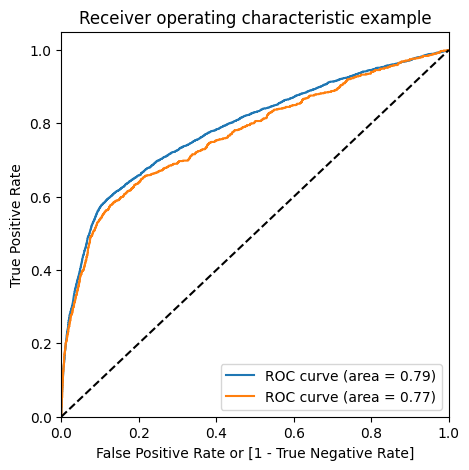

In [82]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)